In [1]:
import sympy as sym
from sympy.physics.quantum import Operator,Dagger
from IPython.display import display
from sympy import init_printing
init_printing(use_latex=True)

In [2]:
c1 = Operator("c_1")
c2 = Operator("c_2")
sig1 = Operator("\sigma_1")
sig2 = Operator("\sigma_2")
dBk = Operator("dB_k")
dBl = Operator("dB_l")
dFk = Operator("dF_k,")
dFm = Operator("dF_m")
hbar,Delc1,Delc2,Dele1,Dele2,g1,g2 = sym.symbols("\hbar \Delta_{c1} \Delta_{c2} \Delta_{e1} \Delta_{e2} g_1 g_2")
Omc1,Omc2,Ome1,Ome2 = sym.symbols("\Omega_{c1} \Omega_{c2} \Omega_{e1} \Omega_{e2}")
gamfb,gamL,gamR,gamFL,gamFR,phi,psi = sym.symbols("\gamma_{fb} \gamma_L \gamma_R \gamma_{FL} \gamma_{FR} \phi \psi")

In [3]:
MS = -sym.I*(Delc1*Dagger(c1)*c1+Delc2*Dagger(c2)*c2+Dele1*Dagger(sig1)*sig1+Dele2*Dagger(sig2)*sig2+
            g1*(Dagger(c1)*sig1+Dagger(sig1)*c1)+g2*(Dagger(c2)*sig2+Dagger(sig2)*c2)+Omc1*(c1+Dagger(c1))+Omc2*(c2+Dagger(c2))+
            Ome1*(sig1+Dagger(sig1))+Ome2*(sig2+Dagger(sig2)))
MB = (sym.sqrt(gamfb)*dBl*sym.exp(-sym.I*phi)*Dagger(c2)-sym.sqrt(gamfb)*Dagger(dBl)*sym.exp(sym.I*phi)*c2+
      sym.sqrt(gamL)*dBk*Dagger(c1)-sym.sqrt(gamL)*Dagger(dBk)*c1+sym.sqrt(gamR)*dBk*Dagger(c2)-sym.sqrt(gamR)*Dagger(dBk)*c2)
MF = (sym.sqrt(gamFL)*dFk*Dagger(c1)-sym.sqrt(gamFL)*Dagger(dFk)*c1+
      sym.sqrt(gamFR)*dFm*Dagger(c2)*sym.exp(-sym.I*psi)-sym.sqrt(gamFR)*Dagger(dFm)*c2*sym.exp(sym.I*psi))

M = MS+MB+MF

T0 = M**0
T1 = M
T2 = M**2/2
T3 = (MF+MB)**3/6+(MS*(MF+MB)**2+(MF+MB)*MS*(MF+MB)+(MF+MB)**2*MS)/6
T4 = (MF+MB)**4/24

In [4]:
from sympy.physics.quantum import Commutator

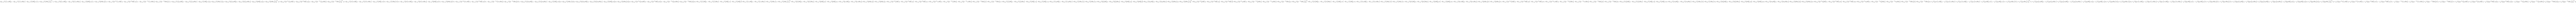

In [5]:
comm_SB = Commutator(MS.expand(),MB)
comm_SB.doit().expand()

In [6]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(A[:,:1])

[[ 1]
 [ 4]
 [ 7]
 [10]]


In [7]:
N=1
print("%04d"%N)

0001


In [8]:
import numpy as np
import scipy as sc
N_env = 5
dt=.1
ncdiag = np.linspace(0,N_env+.1,2*N_env+1).astype(np.int64)
nc = np.diag(ncdiag)
nc2 = np.diag(ncdiag-1)
print(nc*nc2)

dB =  sc.eye(N_env,N_env,1)*np.sqrt(dt*np.arange(0,N_env)) 
dBd =  sc.eye(N_env,N_env,-1)*np.sqrt(dt*np.arange(1,N_env+1)) 
print(np.einsum("jk,ki->ji",np.einsum("ji,ik->jk",dBd,np.einsum("ij,jk->ik",dBd,dB)),dB))
print(np.einsum("ij,jk->ik",dBd,dB))


[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0 20]]
[[0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.  ]
 [0.   0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   0.12]]
[[0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.3 0. ]
 [0.  0.  0.  0.  0.4]]


In [9]:
nBdiag = np.linspace(0,N_env,N_env+1).astype(np.int64)
print(nBdiag)

[0 1 2 3 4 5]


In [1]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


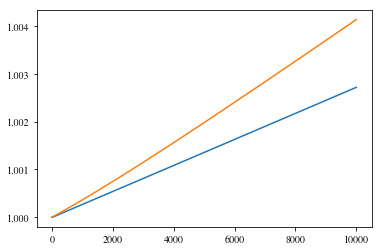

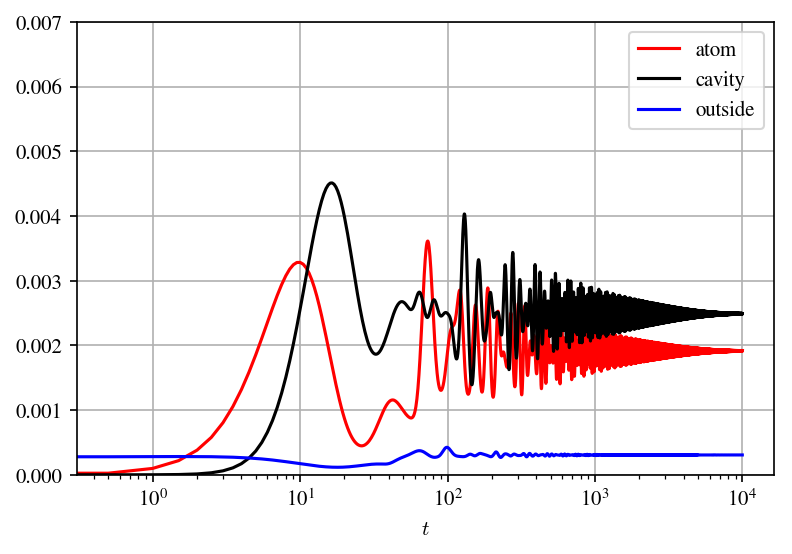

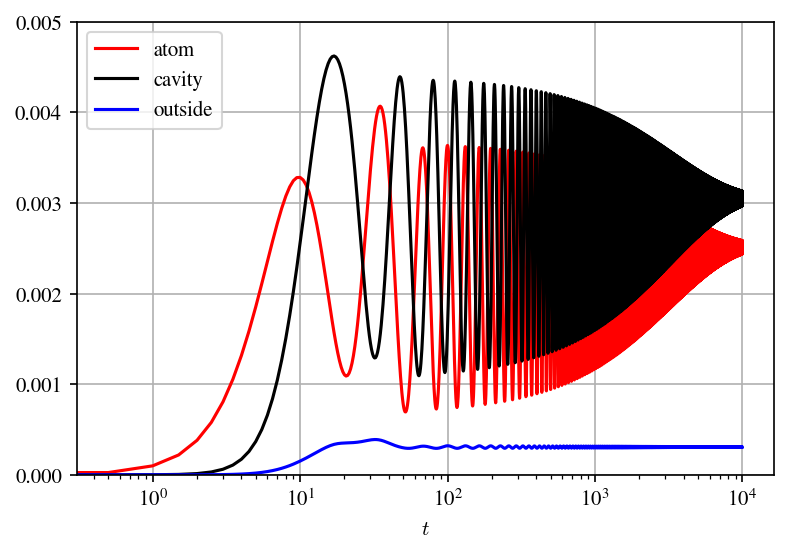

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/evol%04d_atom_drive_A.txt"%20)),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/evol%04d_atom_drive_A.txt"%15)),dtype=complex)
t_1 = dat1[:,0]
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
g2_1 = dat1[:,6]
NB_1 = dat1[:,7]
t_2 = dat2[:,0]
norm_2 = dat2[:,1]
exc_2 = dat2[:,2]
gr_2 = dat2[:,3]
cav_2 = dat2[:,4]
g2c_2 = dat2[:,5]
g2_2 = dat2[:,6]
NB_2 = dat2[:,7]

plt.figure(0)
plt.plot(t_1,norm_1)
plt.plot(t_2,norm_2)

plt.figure(1,dpi=150)
plt.plot(t_1,exc_1,label="atom",color="r")
plt.plot(t_1,cav_1,label="cavity",color="k")
plt.plot(t_1[30:]-15,NB_1[30:],label="outside",color="b")
plt.xscale("log")
plt.ylim(0,.007)
plt.xlabel("$t$")
plt.legend(loc="best")
plt.grid(True)

plt.figure(2,dpi=150)
plt.plot(t_2,exc_2,label="atom",color="r")
plt.plot(t_2,cav_2,label="cavity",color="k")
plt.plot(t_2[0:],NB_2[0:],label="outside",color="b")
plt.ylim(0,.005)
plt.xlabel("$t$")
plt.xscale("log")
plt.legend(loc="best")
plt.grid(True)#plt.yscale("log")

(6.096308849679673e-05+1.0359789793524802e-25j) (6.0963952038805015e-05+1.2292399917661604e-09j)
(1.0155328418312486+0j) (0.8653785961266218+0j)


/home/nnem614/Documents/anaconda3/envs/py/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, '$\\tau_p$')

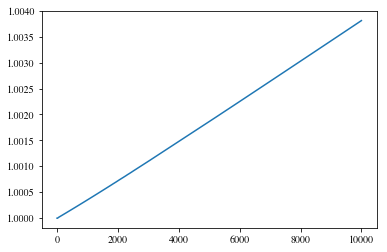

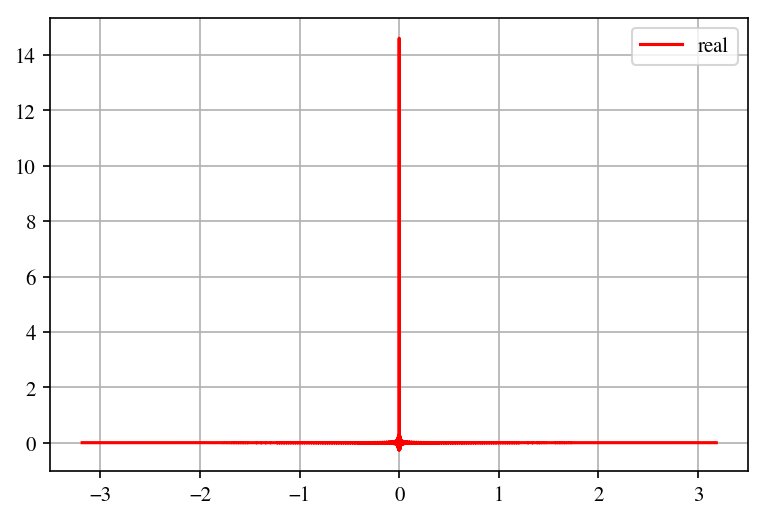

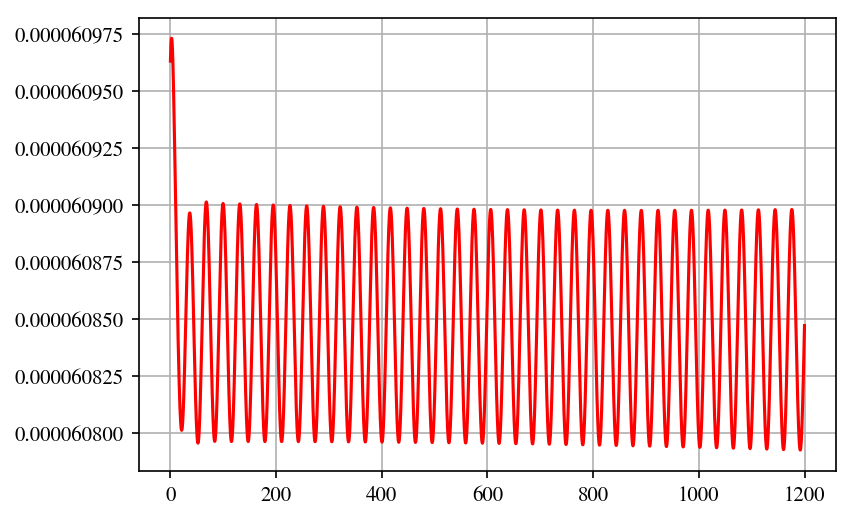

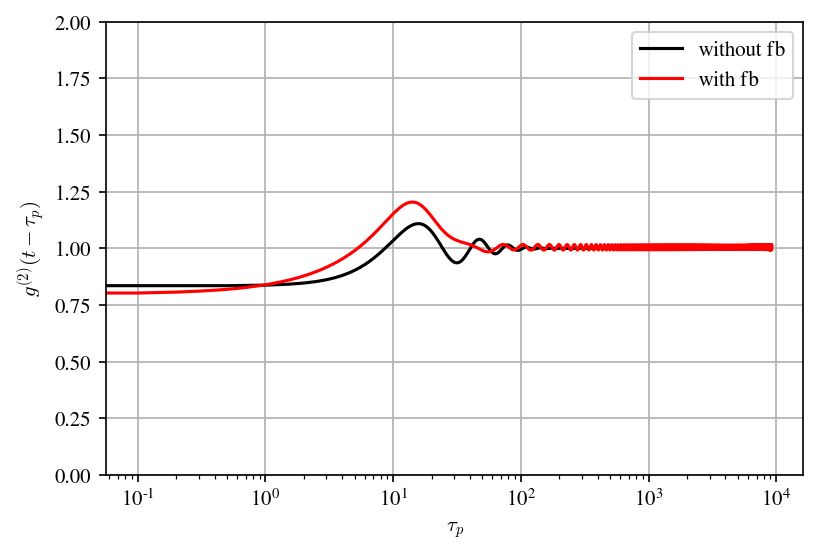

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

datspec = np.genfromtxt((conv(x) for x in \
                      open("./Data/spec%04d_atom_drive_A.txt"%ID)),dtype=complex)
datg2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/g2tau%04d_atom_drive_A.txt"%ID)),dtype=complex)
datg22 = np.genfromtxt((conv(x) for x in \
                      open("./Data/g2tau%04d_atom_drive_A.txt"%0)),dtype=complex)
datcorr = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%ID)),dtype=complex)
om = datspec[:,0]
specre = datspec[:,1]
specim = datspec[:,2]
t = datcorr[:,0]
corr = datcorr[:,1]
tg = datg2[:,0]
g2 = datg2[:,1]
tg2 = datg22[:,0]
g22 = datg22[:,1]

plt.figure(0)
plt.plot(t_1,norm_1)
#plt.plot(t_2,norm_2)

plt.figure(1,dpi=150)
plt.plot(om/2/np.pi,specre,label="real",color="r")
#plt.plot(om,specim,label="imag",color="k")
#plt.xscale("log")
#plt.ylim(0,.007)
plt.legend(loc="best")
plt.grid(True)

plt.figure(2,dpi=150)
plt.plot(t[0:],corr[0:],label="atom",color="r")
print(corr[0],corr[1])
#plt.ylim(0,.005)
#plt.xscale("log")
#plt.legend(loc="best")
plt.grid(True)#plt.yscale("log")

plt.figure(3,dpi=150)
plt.plot(tg2,g22,label="without fb",color="k")
plt.plot(tg,g2,label="with fb",color="r")
print(g2[-32],g2[0])
plt.ylim(0,2)
plt.xscale("log")
plt.legend(loc="best")
plt.grid(True)#plt.yscale("log")
plt.ylabel("$g^{(2)}(t-\\tau_p)$")
plt.xlabel("$\\tau_p$")

(0.00015312525919211446+1.1480882108790236e-41j) (0.0003071086131212599-1.2286749964676887e-20j)


/home/nnem614/Documents/anaconda3/envs/py/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


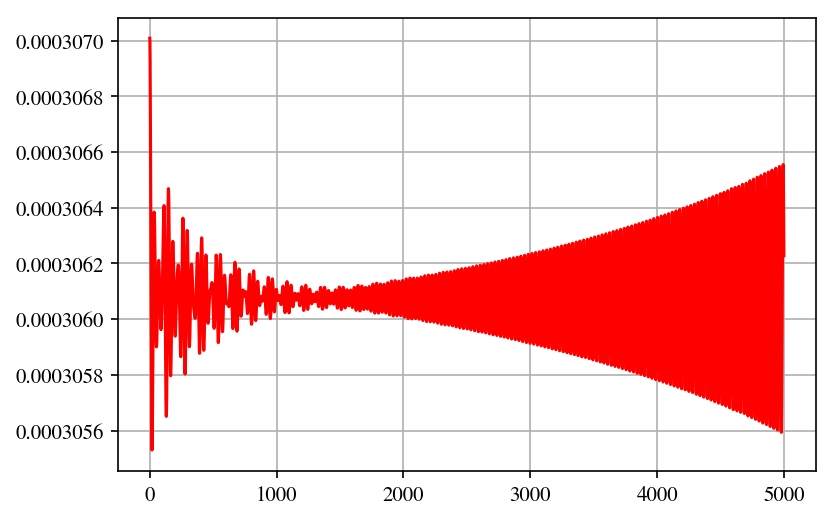

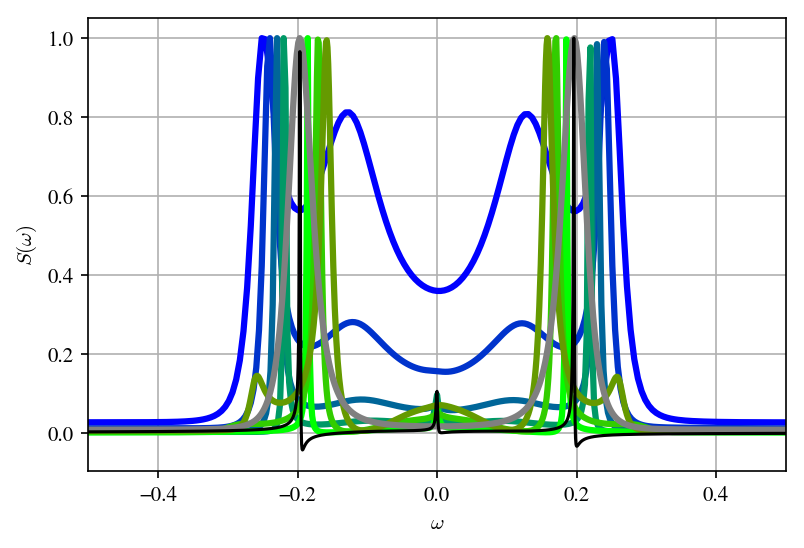

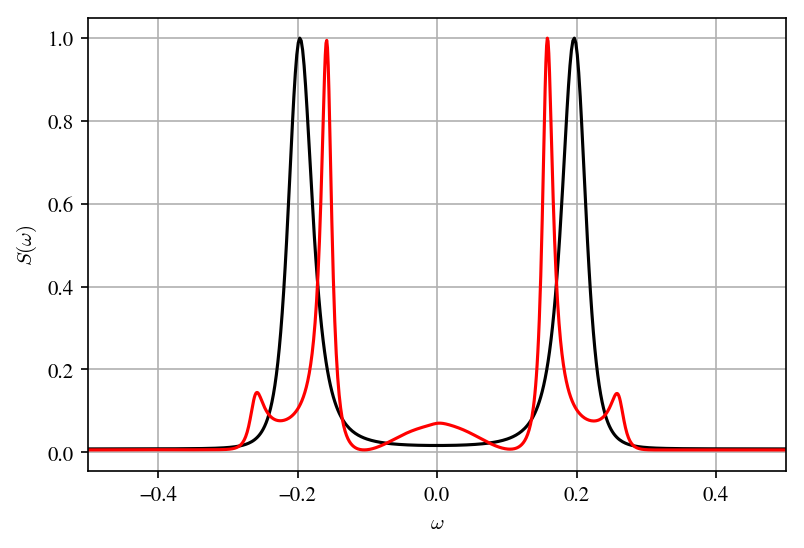

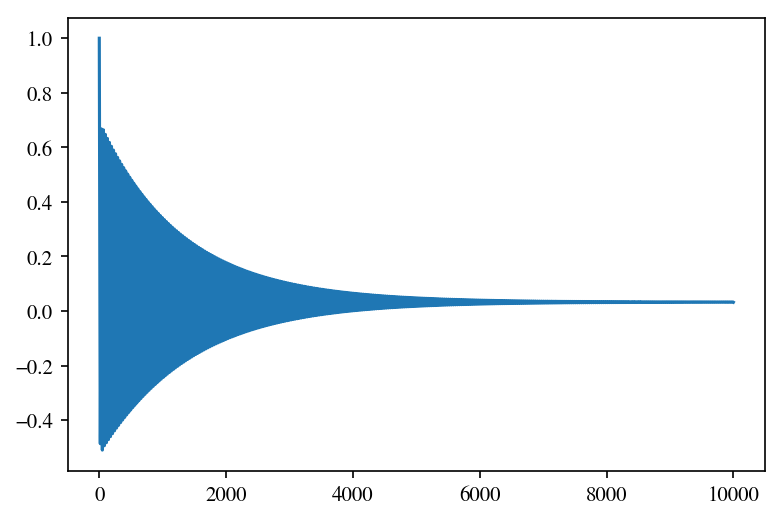

In [73]:
datAlex = np.genfromtxt((conv(x) for x in \
                      open("./Data/Alex_corr.txt")),dtype=complex)

datcorr0 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%0)),dtype=complex)
datcorr1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%18)),dtype=complex)
datcorr3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%10)),dtype=complex)
datcorr4 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%11)),dtype=complex)
datcorr5 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%12)),dtype=complex)
datcorr6 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%13)),dtype=complex)
datcorr7 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%14)),dtype=complex)
datcorr85 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%2)),dtype=complex)
datcorr10 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%16)),dtype=complex)
datcorr125 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%17)),dtype=complex)
datcorr15 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%18)),dtype=complex)
datcorr30 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%19)),dtype=complex)
datcorr50 = np.genfromtxt((conv(x) for x in \
                      open("./Data/corr%04d_atom_drive_A.txt"%20)),dtype=complex)

tA = datAlex[:,0]
corrA = datAlex[:,1]
t0 = datcorr0[:,0]
t1 = datcorr1[:,0]
corr0 = datcorr0[:,1]
corr1 = datcorr1[:,1]
t3 = datcorr3[:,0]
t4 = datcorr4[:,0]
corr3 = datcorr3[:,1]
corr4 = datcorr4[:,1]
t85 = datcorr85[:,0]
t5 = datcorr5[:,0]
corr5 = datcorr5[:,1]
corr85 = datcorr85[:,1]
t15 = datcorr15[:,0]
corr15 = datcorr15[:,1]
t6 = datcorr6[:,0]
t7 = datcorr7[:,0]
t10 = datcorr10[:,0]
t125 = datcorr125[:,0]
t30 = datcorr30[:,0]
t50 = datcorr50[:,0]
corr6 = datcorr6[:,1]
corr7 = datcorr7[:,1]
corr10 = datcorr10[:,1]
corr125 = datcorr125[:,1]
corr30 = datcorr30[:,1]
corr50 = datcorr50[:,1]

print(corr0[0],corr1[0])
plt.figure(1,dpi=150)
plt.grid(True)
#plt.plot(t0,(corr0),color="k")
#plt.plot(t15,(corr15),color="r")
#plt.plot(t3,(corr3),color="k")
#plt.plot(t4,(corr4),color="r")
#plt.plot(t5,(corr5),color="k")
plt.plot(t50,(corr50),color="r")
#plt.plot(t85,0.000060846*np.ones(len(t85)))


specA = np.fft.fftshift(np.fft.fft((corrA-np.mean(corrA[-1000:]))))
spec0 = np.fft.fftshift(np.fft.fft((corr0-np.mean(corr0[-1000:]))))
spec1 = np.fft.fftshift(np.fft.fft((corr1-np.mean(corr1[-1000:]))))
spec3 = np.fft.fftshift(np.fft.fft((corr3-np.mean(corr3[-1000:]))))
spec4 = np.fft.fftshift(np.fft.fft((corr4-np.mean(corr4[-1000:]))))
spec5 = np.fft.fftshift(np.fft.fft((corr5-np.mean(corr5[-1000:]))))
spec6 = np.fft.fftshift(np.fft.fft((corr6-np.mean(corr6[-1000:]))))
spec7 = np.fft.fftshift(np.fft.fft((corr7-np.mean(corr7[-1000:]))))
spec10 = np.fft.fftshift(np.fft.fft((corr10-np.mean(corr10[-1000:]))))
spec125 = np.fft.fftshift(np.fft.fft((corr125-np.mean(corr125[-1000:]))))
spec30 = np.fft.fftshift(np.fft.fft((corr30-np.mean(corr30[-1000:]))))
spec50 = np.fft.fftshift(np.fft.fft((corr50-np.mean(corr50[-1000:]))))
spec85 = np.fft.fftshift(np.fft.fft((corr85-0.000060848*np.ones(len(t85)))))
spec15 = np.fft.fftshift(np.fft.fft((corr15-np.mean(corr15[-1000:]))))
omA  = np.fft.fftshift(np.fft.fftfreq(len(tA),(tA[1]-tA[0])))
om0  = np.fft.fftshift(np.fft.fftfreq(len(t0),(t0[1]-t0[0])))
om1  = np.fft.fftshift(np.fft.fftfreq(len(t1),(t1[1]-t1[0])))
om3  = np.fft.fftshift(np.fft.fftfreq(len(t3),(t3[1]-t3[0])))
om4  = np.fft.fftshift(np.fft.fftfreq(len(t4),(t4[1]-t4[0])))
om5  = np.fft.fftshift(np.fft.fftfreq(len(t5),(t5[1]-t5[0])))
om85  = np.fft.fftshift(np.fft.fftfreq(len(t85),(t85[1]-t85[0])))
om15  = np.fft.fftshift(np.fft.fftfreq(len(t15),(t15[1]-t15[0])))
om6  = np.fft.fftshift(np.fft.fftfreq(len(t6),(t6[1]-t6[0])))
om7  = np.fft.fftshift(np.fft.fftfreq(len(t7),(t7[1]-t7[0])))
om10  = np.fft.fftshift(np.fft.fftfreq(len(t10),(t10[1]-t10[0])))
om125  = np.fft.fftshift(np.fft.fftfreq(len(t125),(t125[1]-t125[0])))
om30  = np.fft.fftshift(np.fft.fftfreq(len(t30),(t30[1]-t30[0])))
om50  = np.fft.fftshift(np.fft.fftfreq(len(t50),(t50[1]-t50[0])))

color = [None]*10

def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
    return [r/255, g/255, b/255]

for i in range(10):
    color[i] = rgb(0,10,i)
    #print(color[i])

plt.figure(2,dpi=150)
plt.plot(om3*2*np.pi,spec3.real/np.max(spec3.real),color=color[0],label="$\\tau=3$",lw=3)
plt.plot(om4*2*np.pi,spec4.real/np.max(spec4.real),color=color[1],label="$\\tau=4$",lw=3)
plt.plot(om5*2*np.pi,spec5.real/np.max(spec5.real),color=color[2],label="$\\tau=5$",lw=3)
plt.plot(om6*2*np.pi,spec6.real/np.max(spec6.real),color=color[3],label="$\\tau=6$",lw=3)
#plt.plot(om7*2*np.pi,spec7.real/np.max(spec7.real),color=color[4],label="$\\tau=7$",lw=3)
plt.plot(om10*2*np.pi,spec10.real/np.max(spec10.real),color=color[5],label="$\\tau=10$",lw=3)
plt.plot(om125*2*np.pi,spec125.real/np.max(spec125.real),color=color[6],label="$\\tau=12.5$",lw=3)
plt.plot(om15*2*np.pi,spec15.real/np.max(spec15.real),color=color[7],label="$\\tau=15$",lw=3)
#plt.plot(om30*2*np.pi,spec30.real/np.max(spec30.real),color=color[8],label="$\\tau=30$",lw=3)
#plt.plot(om50*2*np.pi,spec50.real/np.max(spec50.real),color=color[9],label="$\\tau=50$",lw=3)
plt.plot(om0*2*np.pi,spec0.real/np.max(spec0.real),color="grey",label="no fb",lw=3)
plt.plot(omA*2*np.pi,specA/np.max(specA),color="k",label="$\\tau=8.5$")
#plt.plot(om0*2*np.pi,spec0.imag,ls="--",color="k")
plt.grid(True)
#plt.legend(loc="best")
#plt.plot(om1*2*np.pi,spec1.imag,ls="--",color="red")
plt.xlabel("$\omega$")
plt.ylabel("$S(\omega)$")
plt.xlim(-.5,.5)


plt.figure(3,dpi=150)
plt.plot(om0*2*np.pi,spec0.real/np.max(spec0.real),color="k")
#plt.plot(om0*2*np.pi,spec0.imag,ls="--",color="k")
plt.grid(True)
plt.plot(om1*2*np.pi,spec1.real/np.max(spec1.real),color="red")
#plt.plot(om1*2*np.pi,spec1.imag,ls="--",color="red")
plt.xlabel("$\omega$")
plt.ylabel("$S(\omega)$")
plt.xlim(-.5,.5)

plt.figure(4,dpi=150)
plt.plot(tA,corrA)

In [191]:
import scipy as sc
N_env = 5
dt=1
init = np.array([1,0,0,0,0])
dB  = sc.eye(N_env,N_env,1)*np.sqrt(dt*np.arange(0,N_env)) 
dBd = sc.eye(N_env,N_env,-1)*np.sqrt(dt*np.arange(1,N_env+1)) 
print(np.dot(dB,init))

[0. 0. 0. 0. 0.]


In [149]:
a=5.
isinstance(a,float)

True

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 300)

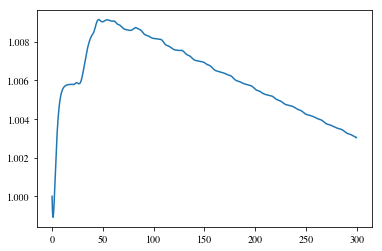

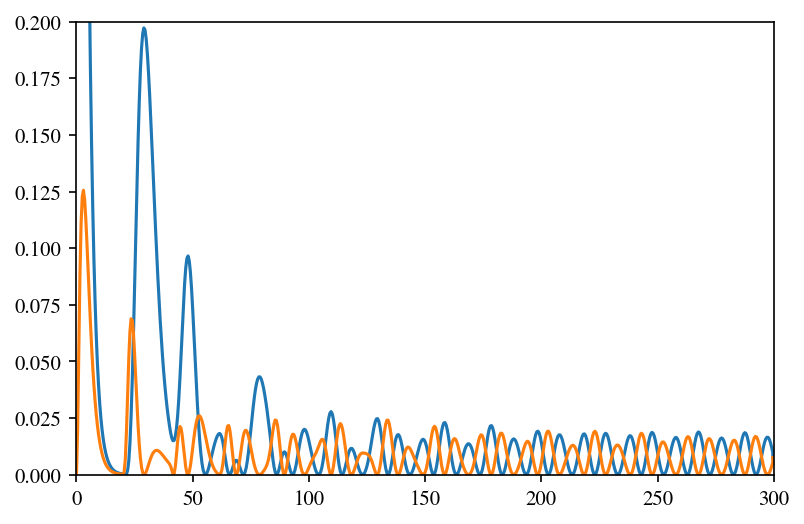

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/evol%04d.txt"%0)),dtype=complex)
t_1 = dat1[:,0]
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
g2_1 = dat1[:,6]
NB_1 = dat1[:,7]

plt.figure(0)
plt.plot(t_1,norm_1)

plt.figure(1,dpi=150)
plt.plot(t_1,exc_1)
plt.plot(t_1,cav_1)
#plt.plot(t_1[30:]-15,NB_1[30:])
plt.ylim(0.,0.2)
plt.xlim(0.,300)
#plt.yscale("log")
#plt.xscale("log")

(1.2700706907504555+0j) (0.11284038745296625+0j)
(-0.11945327895285168+0j) (-0.7865830646149656+0j)
(0.06340186026395182+0j) (0.005655079369160055+0j)
2978
(0.5749961806170151+0j) (0.6120270068696629+0j) (0.5999853277848033+0j)


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'$\\kappa t$')

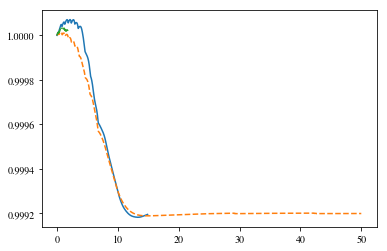

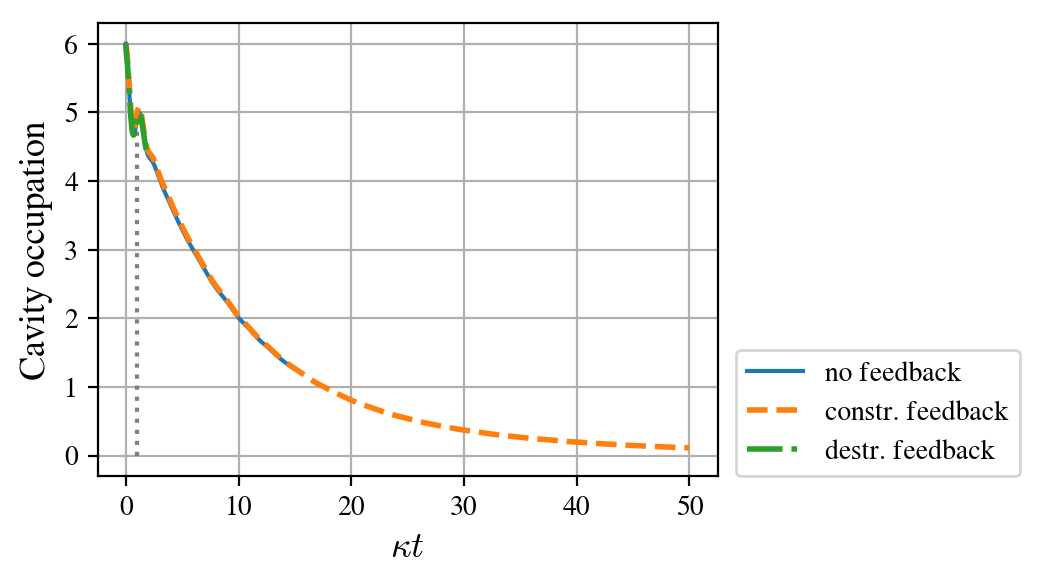

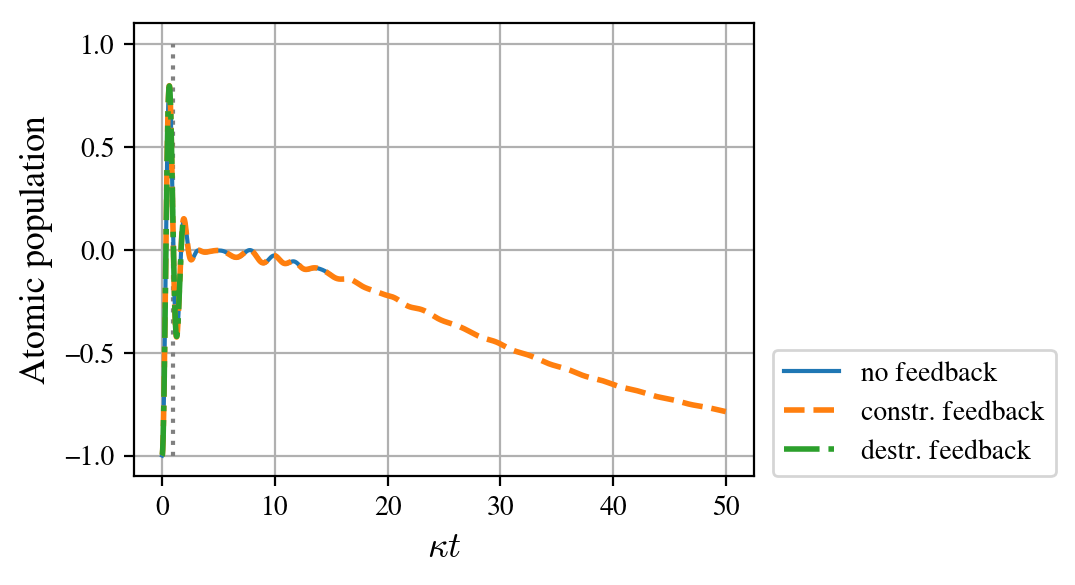

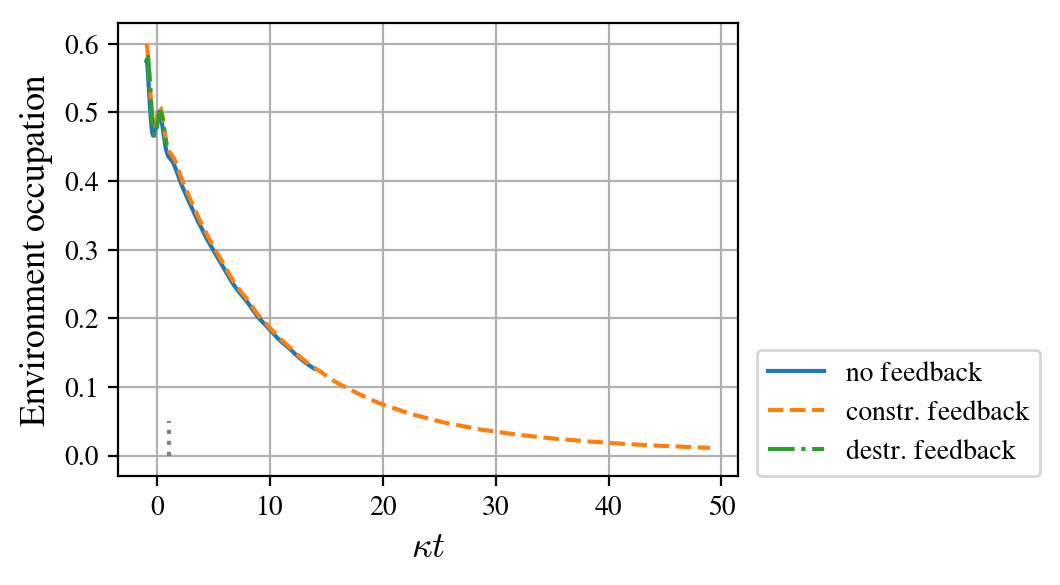

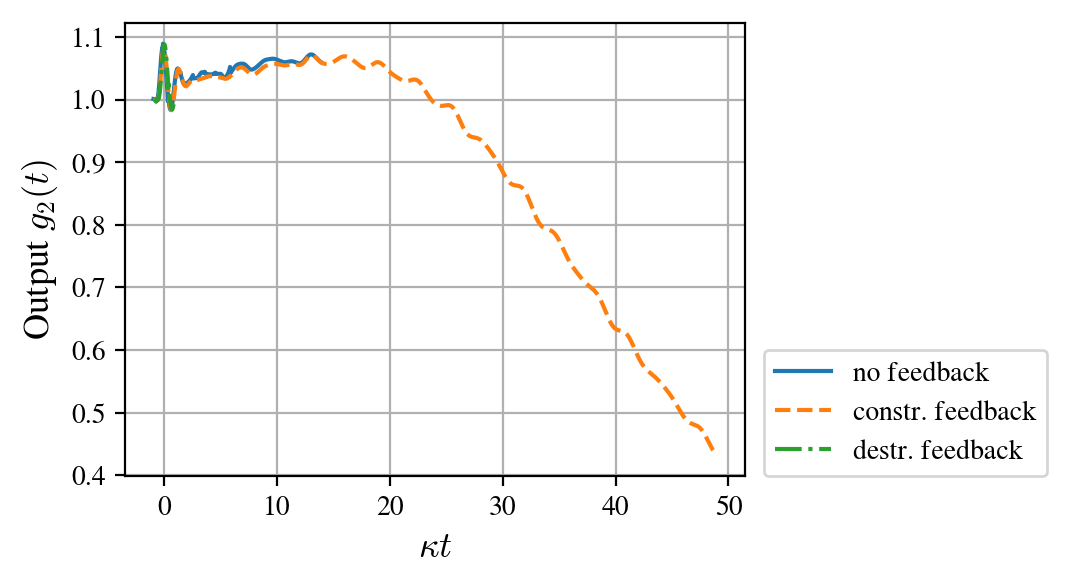

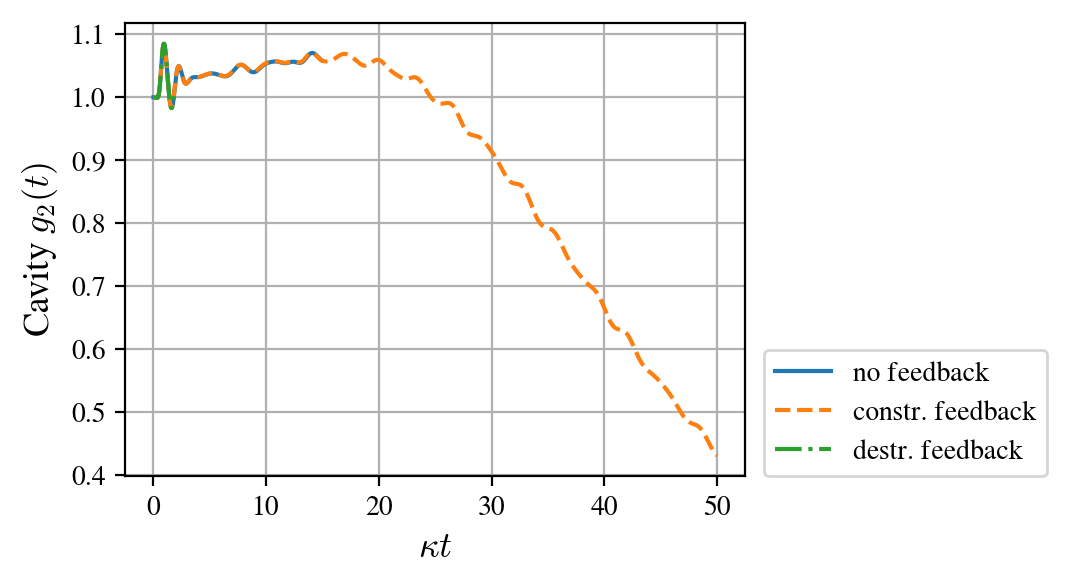

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%143)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_atom_drive.txt"%31)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%31)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%141)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_atom_drive.txt"%32)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%32)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%145)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_atom_drive.txt"%33)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%33)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
#dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d.txt"%1)),dtype=complex)
kap1=0.1
kappa=0.12
tau=1#0.4
dt=0.005
L=9#int(tau/dt+1)

t_1 = dat1[:,0]/tau
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
g2_1 = dat1[:,6]
NB_1 = dat1[:,7]
t_2 = dat2[:,0]/tau
norm_2 = dat2[:,1]
exc_2 = dat2[:,2]
gr_2 = dat2[:,3]
cav_2 = dat2[:,4]
g2c_2 = dat2[:,5]
g2_2 = dat2[:,6]
NB_2 = dat2[:,7]
t_3 = dat3[:,0]/tau
norm_3 = dat3[:,1]
exc_3 = dat3[:,2]
gr_3 = dat3[:,3]
cav_3 = dat3[:,4]
g2c_3 = dat3[:,5]
g2_3 = dat3[:,6]
NB_3 = dat3[:,7]

print(cav_1[-1],cav_2[-1])
print(exc_1[-1]-gr_1[-1],exc_2[-1]-gr_2[-1])
print(NB_1[-1]/0.01,NB_2[-1]/0.01)
print(len(t_1))

plt.figure(0)
plt.plot(t_1,norm_1)
plt.plot(t_2,norm_2,ls="--")
plt.plot(t_3,norm_3,ls="-.")
plt.figure(1,dpi=200,figsize=(4,3))
plt.vlines(1,0,5,color="grey",linestyle=":")
plt.plot(t_1,cav_1,label="no feedback")
plt.plot(t_2,cav_2,lw=2,ls="--",label="constr. feedback")
plt.plot(t_3,cav_3,lw=2,ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.ylabel("Cavity occupation",fontsize = 13)
#plt.xlim(0,10)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,10)

plt.figure(2,dpi=200,figsize=(4,3))
plt.plot(t_1,exc_1-gr_1,label="no feedback")
plt.plot(t_2,exc_2-gr_2,lw=2,ls="--",label="constr. feedback")
plt.plot(t_3,exc_3-gr_3,lw=2,ls="-.",label="destr. feedback")
plt.vlines(1,-1,1,color="grey",linestyle=":")
plt.legend(loc = (1.03,.0))
plt.ylabel("Atomic population",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,10)

#plt.xlim(0,4)

plt.figure(3,dpi=200,figsize=(4,3))
plt.plot(t_1[L:]-1,NB_1[L:]/dt, label="no feedback")
plt.plot(t_2[L:]-1,NB_2[L:]/dt, ls="--",label="constr. feedback")
plt.plot(t_3[33:]-1,NB_3[33:]/dt, ls="-.",label="destr. feedback")
plt.vlines(1,0,0.05,color="grey",linestyle=":")
#print(NB_2[L]/dt*np.exp(-1.*0.04),NB_1[L]/dt)
#print(NB_2[L]/dt*np.exp(-1.*0.16),NB_3[33]/dt)
print(NB_1[L]/dt,NB_3[L]/dt,NB_2[L]/dt)
plt.grid(True)
plt.ylabel("Environment occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))

plt.figure(4,dpi=200,figsize=(4,3))
plt.plot(t_1[L:]-1,g2_1[L:], label="no feedback")
plt.plot(t_2[L:]-1,g2_2[L:],ls="--", label="constr. feedback")
plt.plot(t_3[33:]-1,g2_3[33:], ls="-.",label="destr. feedback")
plt.ylabel("Output $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
#plt.xlim(0,5)
plt.grid(True)

plt.figure(5,dpi=200,figsize=(4,3))
plt.plot(t_1[1:-1],g2c_1[1:-1], label="no feedback")
plt.plot(t_2[1:-1],g2c_2[1:-1],ls="--",label="constr. feedback")
plt.plot(t_3[1:-1],g2c_3[1:-1], ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.grid(True)
plt.ylabel("Cavity $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)


In [12]:
0.1/0.12

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0j
366 0.005
[-100.          -99.45355191  -98.90710383  -98.36065574  -97.81420765
  -97.26775956  -96.72131148  -96.17486339  -95.6284153   -95.08196721
  -94.53551913  -93.98907104  -93.44262295  -92.89617486  -92.34972678
  -91.80327869  -91.2568306   -90.71038251  -90.16393443  -89.61748634
  -89.07103825  -88.52459016  -87.97814208  -87.43169399  -86.8852459
  -86.33879781  -85.79234973  -85.24590164  -84.69945355  -84.15300546
  -83.60655738  -83.06010929  -82.5136612   -81.96721311  -81.42076503
  -80.87431694  -80.32786885  -79.78142077  -79.23497268  -78.68852459
  -78.1420765   -77.59562842  -77.04918033  -76.50273224  -75.95628415
  -75.40983607  -74.86338798  -74.31693989  -73.7704918   -73.22404372
  -72.67759563  -72.13114754  -71.58469945  -71.03825137  -70.49180328
  -69.94535519  -69.3989071   -68.85245902  -68.30601093  -67.75956284
  -67.21311475  -66.66666667  -66.12021858  -65.57377049  -65.0273224
  -64.48087432  -63.93442623  -63.38797814  -62.84153005  -62.2950

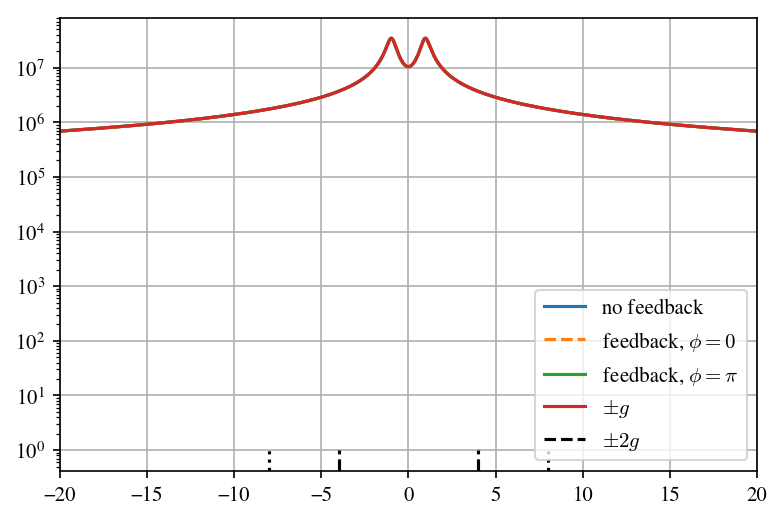

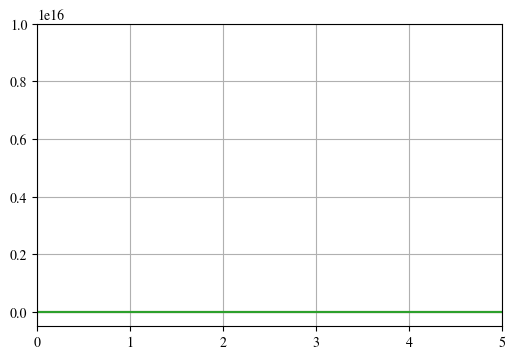

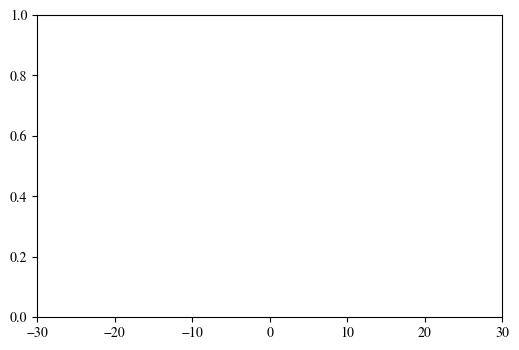

In [13]:
ID=41
dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%ID)),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%(ID+1))),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%(ID+1))),dtype=complex)
dat4 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%(ID+1))),dtype=complex)
datg2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/g2tau%04d_coherent_environment.txt"%ID)),dtype=complex)
datg21 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/g2tau%04d_coherent_environment.txt"%(ID+1))),dtype=complex)
datg22 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/g2tau%04d_coherent_environment.txt"%(ID+1))),dtype=complex)
om = dat1[:,0]
spec=dat1[:,1]
om2 = dat2[:,0]
spec2=dat2[:,1]
om3 = dat3[:,0]
spec3=dat3[:,1]
om4 = dat4[:,0]
spec4=dat4[:,1]
tau=datg2[:,0]
g2=datg2[:,1]
tau2=datg22[:,0]
g22=datg22[:,1]
tau1=datg21[:,0]
g21=datg21[:,1]
kap=2
g=4
plt.figure(dpi=150)
plt.plot(om,spec)#/np.max(spec))
plt.plot(om4,spec4,ls="--")#/np.max(spec))
plt.plot(om3,spec3)#/np.max(spec3))
plt.plot(om2,spec2)#/np.max(spec2))
#plt.plot(om,1/(om**2+(kap)**2)/50*2)
plt.xlim(-20,20)
plt.grid(True)
plt.yscale('log')
#plt.hlines(.5*np.max(spec),-10,10,linestyles="dashed")
#plt.vlines(-kap,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(kap,-.0,np.max(spec),linestyles="dashed")
plt.vlines(-g,-.0,1,linestyles="dashed")
plt.vlines(-np.sqrt(4)*g,-.0,1,linestyles="dotted")
plt.vlines(g,-.0,1,linestyles="dashed")
plt.vlines(np.sqrt(4)*g,-.0,1,linestyles="dotted")
plt.legend(["no feedback","feedback, $\phi=0$","feedback, $\phi=\pi$","$\pm g$","$\pm 2g$"],
           loc="lower right")
#plt.ylabel("Emission spectra normalized to maximu")
plt.figure(dpi=100)
plt.grid(True)
plt.plot(tau[1:-5000],g2[1:-5000])
plt.plot(tau1[1:-5000],g21[1:-5000])
plt.plot(tau2[1:-5000],g22[1:-5000])
plt.xlim(0,5)
print(g2[-1])
plt.figure(dpi=100)
fft_1 = np.fft.fftshift(np.fft.fft(NB_1-NB_1[-1]))
fft_2 = np.fft.fftshift(np.fft.fft(NB_2-NB_2[-1]))
fft_3 = np.fft.fftshift(np.fft.fft(NB_3-NB_3[-1]))
print(t_3.shape[-1],np.real(t_3[1]-t_3[0]))
omp = np.fft.fftshift(np.fft.fftfreq(t_3.shape[-1],np.real(t_3[1]-t_3[0])))
#plt.plot(omp*2*np.pi,np.abs(fft_1))
#plt.plot(omp*2*np.pi,np.abs(fft_2))
#plt.plot(omp*2*np.pi,np.abs(fft_3))
print(omp)
plt.xlim(-30,30)

(0.00021157046134964402+0j) (0.0002321805950777842+0j)
(-0.9785153608038538+0j) (-0.9788030625959706+0j)
(0.06340186026395182+0j) (0.005655079369160055+0j)
20000


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'$\\kappa t$')

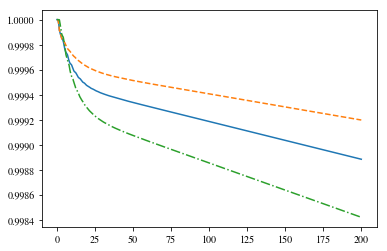

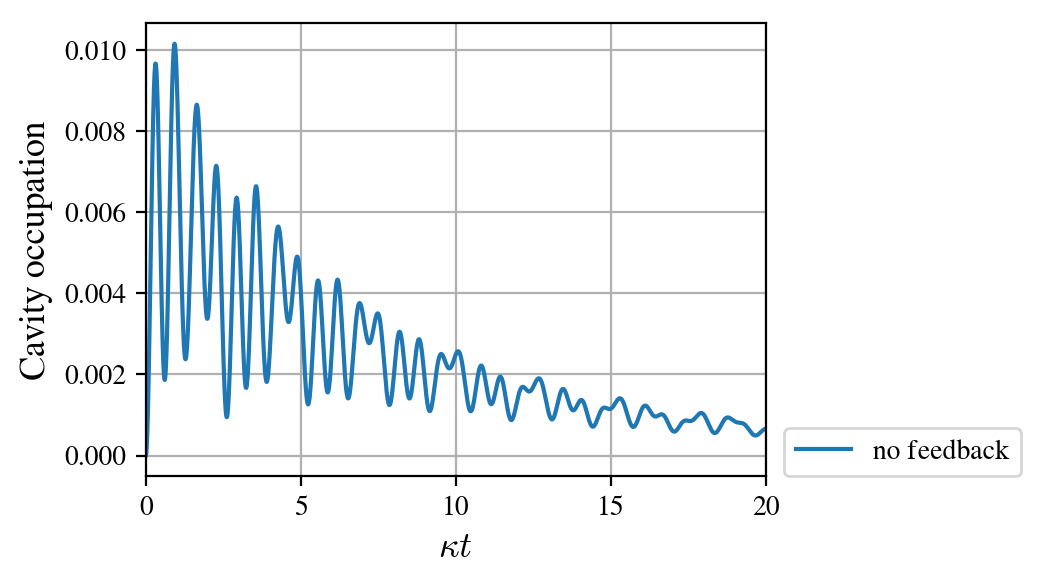

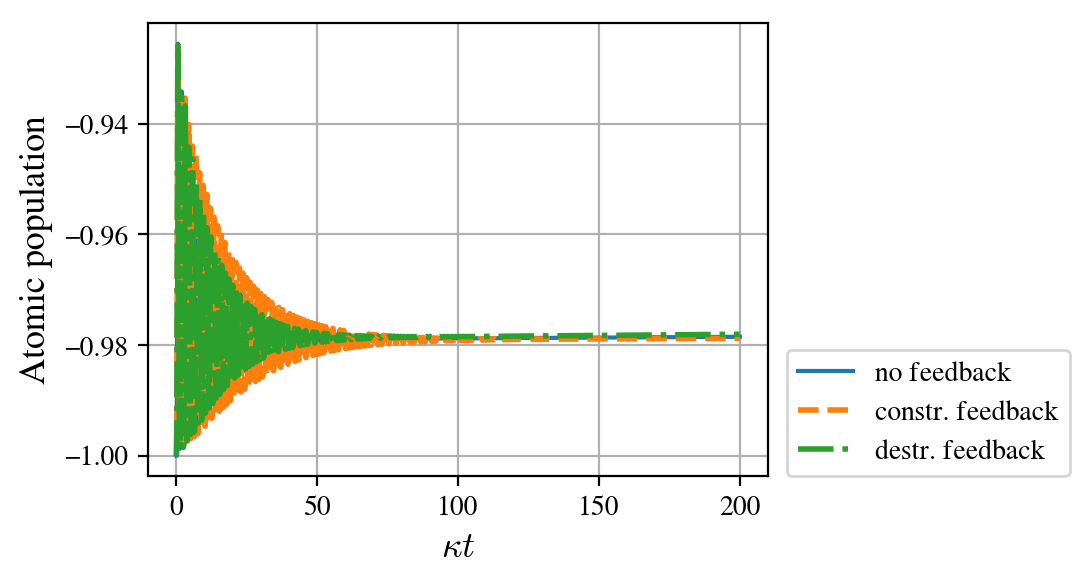

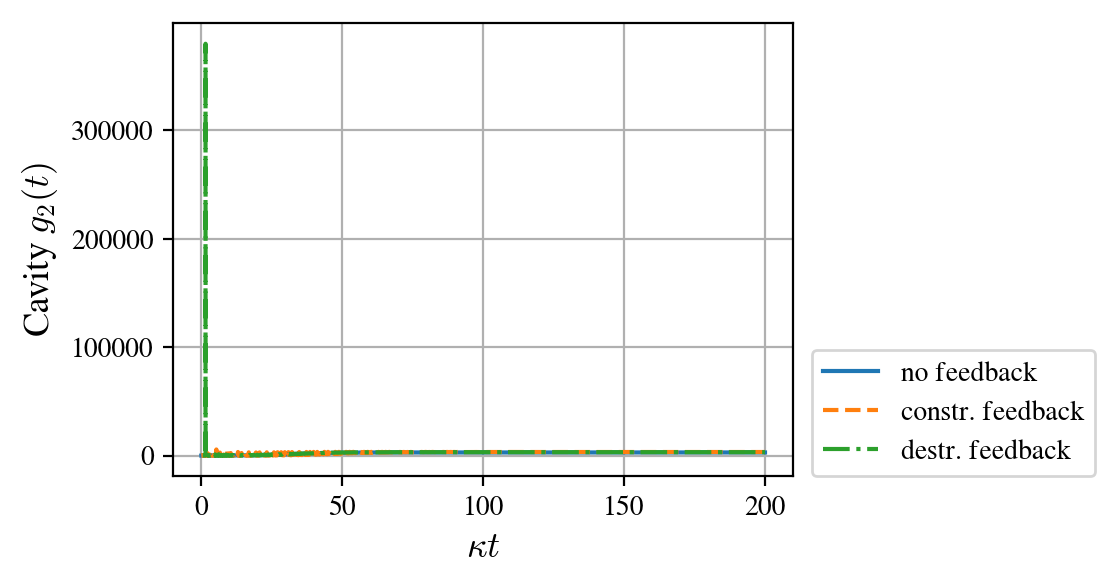

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/04/JC+fb_gL=2p10_gR=2p10_g=100p10_phi=0p10pi_initind=0_ome=0p10_omc=10p10_L=100.txt")),dtype=complex)
#                      open("./Data/01/JC+fb_gL=1p10_gR=1p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/04/JC+fb_gL=2p10_gR=2p10_g=100p10_phi=10p10pi_initind=0_ome=0p10_omc=10p10_L=100.txt")),dtype=complex)
#                      open("./Data/01/JC+fb_gL=1p10_gR=1p10_g=20p10_phi=10p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/04/JC+fb_gL=5p10_gR=0p10_g=100p10_phi=0p10pi_initind=0_ome=0p10_omc=10p10_L=100.txt")),dtype=complex)
#                      open("./Data/01/JC+fb_gL=2p10_gR=0p10_g=20p10_phi=0p10pi_cohe=1p100_initind=0_ome=0p10_omc=0p10_L=10.txt")),dtype=complex)
kap1=0.1
kappa=0.12
tau=0.5#0.4
dt=0.005
L=11#int(tau/dt+1)

t_1 = dat1[:,0]/tau
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
#g2_1 = dat1[:,6]
#NB_1 = dat1[:,7]
t_2 = dat2[:,0]/tau
norm_2 = dat2[:,1]
exc_2 = dat2[:,2]
gr_2 = dat2[:,3]
cav_2 = dat2[:,4]
g2c_2 = dat2[:,5]
#g2_2 = dat2[:,6]
#NB_2 = dat2[:,7]
t_3 = dat3[:,0]/tau
norm_3 = dat3[:,1]
exc_3 = dat3[:,2]
gr_3 = dat3[:,3]
cav_3 = dat3[:,4]
g2c_3 = dat3[:,5]
#g2_3 = dat3[:,6]
#NB_3 = dat3[:,7]

print(cav_1[-1],cav_2[-1])
print(exc_1[-1]-gr_1[-1],exc_2[-1]-gr_2[-1])
print(NB_1[-1]/0.01,NB_2[-1]/0.01)
print(len(t_1))

plt.figure(0)
plt.plot(t_1,norm_1)
plt.plot(t_2,norm_2,ls="--")
plt.plot(t_3,norm_3,ls="-.")
plt.figure(1,dpi=200,figsize=(4,3))
#plt.vlines(1,0,5,color="grey",linestyle=":")
plt.plot(t_1,cav_1,label="no feedback")
#plt.plot(t_2,cav_2,lw=2,ls="--",label="constr. feedback")
#plt.plot(t_3,cav_3,lw=2,ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.ylabel("Cavity occupation",fontsize = 13)
plt.xlim(0,20)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,10)

plt.figure(2,dpi=200,figsize=(4,3))
plt.plot(t_1,exc_1-gr_1,label="no feedback")
plt.plot(t_2,exc_2-gr_2,lw=2,ls="--",label="constr. feedback")
plt.plot(t_3,exc_3-gr_3,lw=2,ls="-.",label="destr. feedback")
#plt.vlines(1,-1,1,color="grey",linestyle=":")
plt.legend(loc = (1.03,.0))
plt.ylabel("Atomic population",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,10)

#plt.xlim(0,4)

#plt.figure(3,dpi=200,figsize=(4,3))
#plt.plot(t_1[L:]-1,NB_1[L:]/dt, label="no feedback")
#plt.plot(t_2[L:]-1,NB_2[L:]/dt, ls="--",label="constr. feedback")
#plt.plot(t_3[L:]-1,NB_3[L:]/dt, ls="-.",label="destr. feedback")
#plt.vlines(1,0,0.05,color="grey",linestyle=":")
#print(NB_2[L]/dt*np.exp(-1.*0.04),NB_1[L]/dt)
#print(NB_2[L]/dt*np.exp(-1.*0.16),NB_3[33]/dt)
#print(NB_1[L]/dt,NB_3[L]/dt,NB_2[L]/dt)
#plt.grid(True)
#plt.ylabel("Environment occupation",fontsize = 13)
#plt.xlabel("$\kappa t$",fontsize = 13)
#plt.legend(loc = (1.03,.0))

#plt.figure(4,dpi=200,figsize=(4,3))
#plt.plot(t_1[L:]-1,g2_1[L:], label="no feedback")
#plt.plot(t_2[L:]-1,g2_2[L:],ls="--", label="constr. feedback")
#plt.plot(t_3[L:]-1,g2_3[L:], ls="-.",label="destr. feedback")
#plt.ylabel("Output $g_2(t)$",fontsize = 13)
#plt.xlabel("$\kappa t$",fontsize = 13)
#plt.legend(loc = (1.03,.0))
##plt.xlim(0,5)
#plt.grid(True)

plt.figure(5,dpi=200,figsize=(4,3))
plt.plot(t_1[1:-1],g2c_1[1:-1], label="no feedback")
plt.plot(t_2[1:-1],g2c_2[1:-1],ls="--",label="constr. feedback")
plt.plot(t_3[1:-1],g2c_3[1:-1], ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.grid(True)
plt.ylabel("Cavity $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4


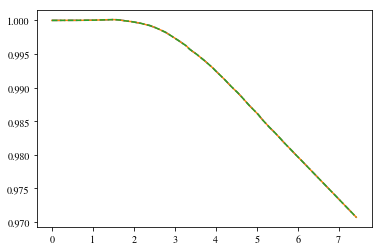

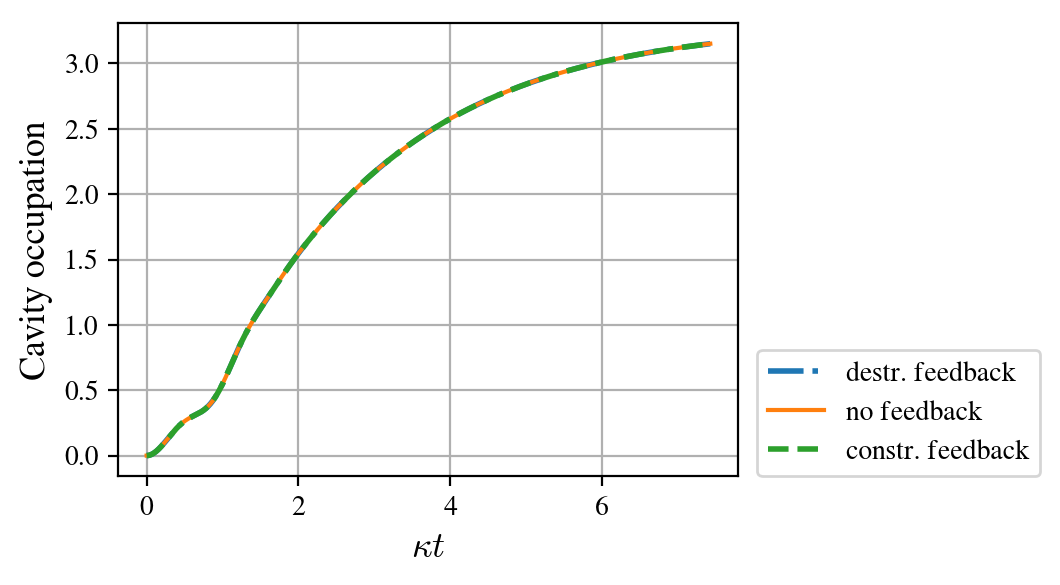

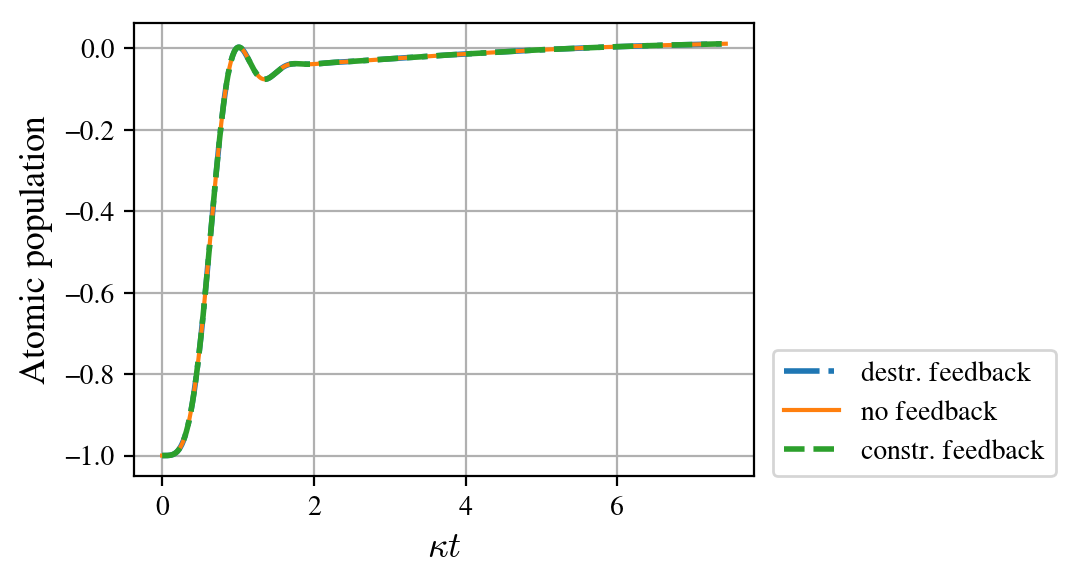

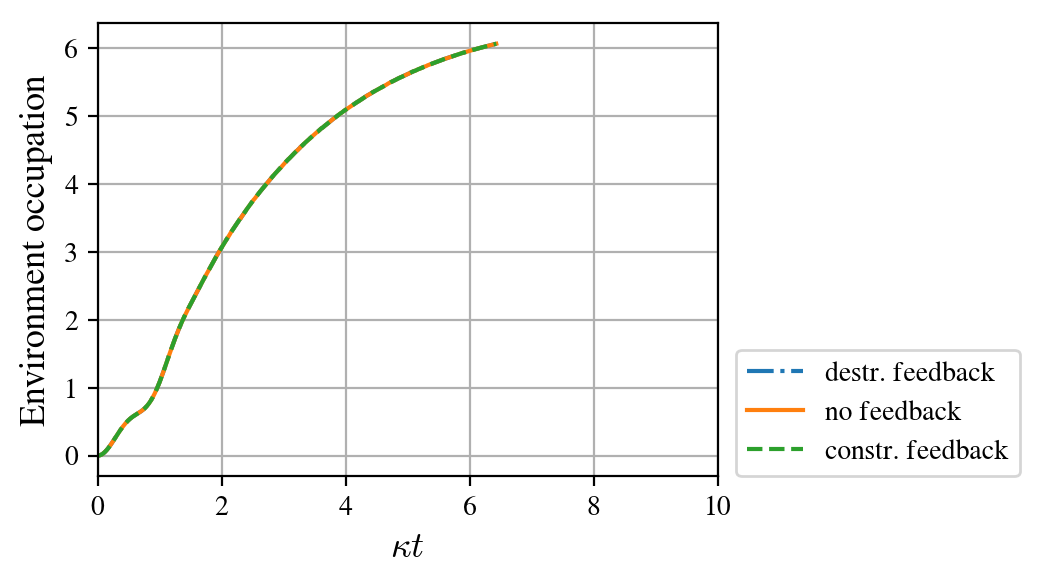

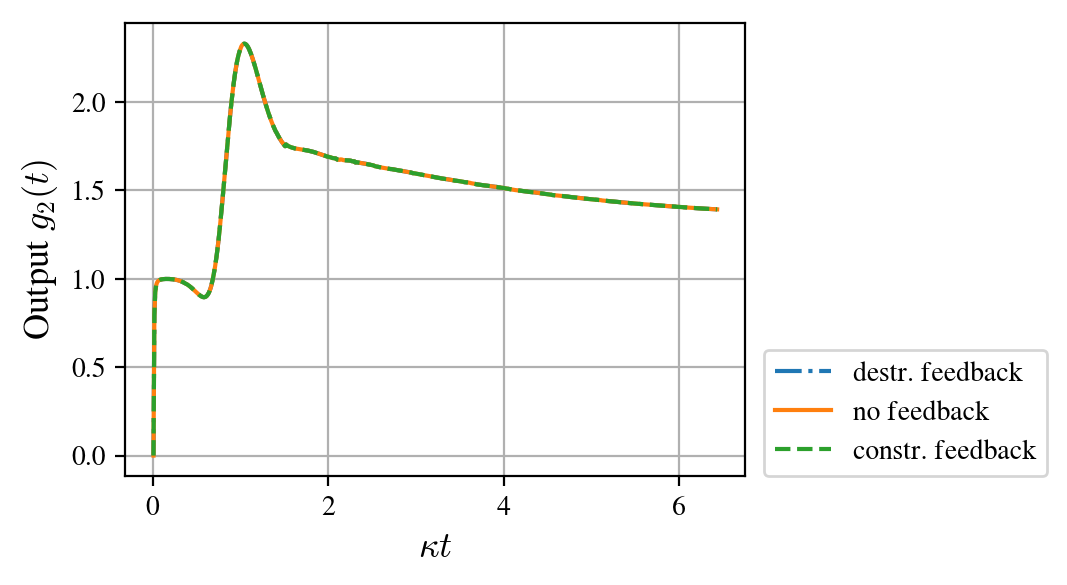

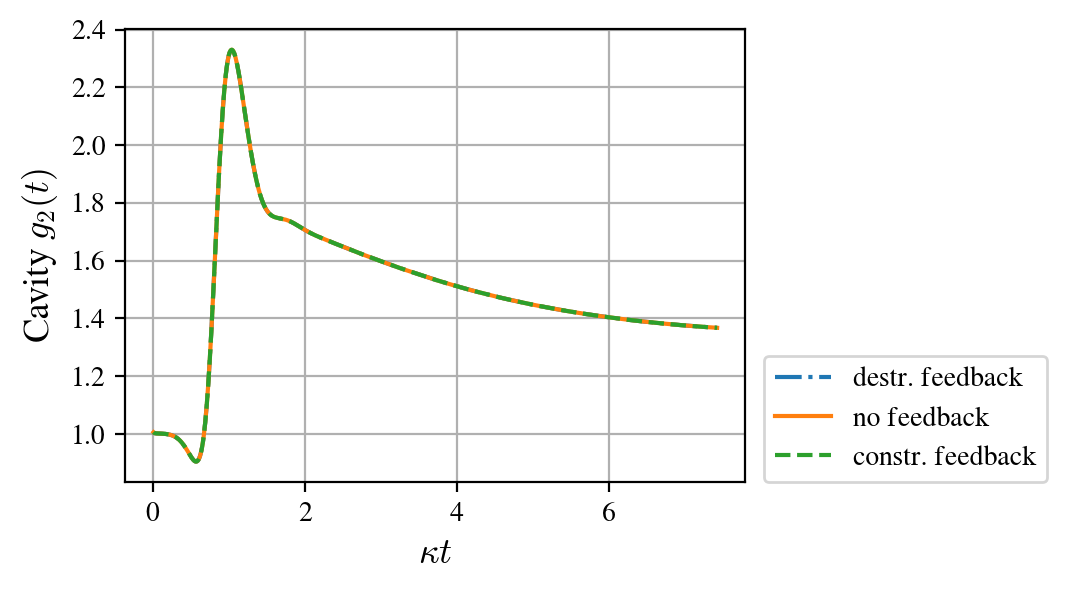

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%1005)),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%1005)),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%1005)),dtype=complex)
#dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d.txt"%1)),dtype=complex)
t_1 = dat1[:,0]/tau
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
g2_1 = dat1[:,6]
NB_1 = dat1[:,7]
t_2 = dat2[:,0]/tau
norm_2 = dat2[:,1]
exc_2 = dat2[:,2]
gr_2 = dat2[:,3]
cav_2 = dat2[:,4]
g2c_2 = dat2[:,5]
g2_2 = dat2[:,6]
NB_2 = dat2[:,7]
t_3 = dat3[:,0]/tau
norm_3 = dat3[:,1]
exc_3 = dat3[:,2]
gr_3 = dat3[:,3]
cav_3 = dat3[:,4]
g2c_3 = dat3[:,5]
g2_3 = dat3[:,6]
NB_3 = dat3[:,7]

tau = 0.5
dt = 0.005
L=101
plt.figure(0)
plt.plot(t_3,norm_3,ls="-.")
plt.plot(t_1,norm_1)
plt.plot(t_2,norm_2,ls="--")
#plt.xlim(0,5)
plt.figure(1,dpi=200,figsize=(4,3))
plt.plot(t_3,cav_3,lw=2,ls="-.",label="destr. feedback")
plt.plot(t_1,cav_1,label="no feedback")
plt.plot(t_2,cav_2,lw=2,ls="--",label="constr. feedback")
plt.legend(loc = (1.03,.0))
plt.ylabel("Cavity occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,4)

plt.figure(2,dpi=200,figsize=(4,3))
plt.plot(t_3,exc_3-gr_3,lw=2,ls="-.",label="destr. feedback")
plt.plot(t_1,exc_1-gr_1,label="no feedback")
plt.plot(t_2,exc_2-gr_2,lw=2,ls="--",label="constr. feedback")
plt.legend(loc = (1.03,.0))
plt.ylabel("Atomic population",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,4)

plt.figure(3,dpi=200,figsize=(4,3))
plt.plot(t_3[L:]-1,NB_3[L:]/dt, ls="-.",label="destr. feedback")
plt.plot(t_1[L:]-1,NB_1[L:]/dt, label="no feedback")
plt.plot(t_2[L:]-1,NB_2[L:]/dt, ls="--",label="constr. feedback")
plt.grid(True)
plt.ylabel("Environment occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
plt.xlim(0,10)

plt.figure(4,dpi=200,figsize=(4,3))
plt.plot(t_3[L:]-1,g2_3[L:], ls="-.",label="destr. feedback")
plt.plot(t_1[L:]-1,g2_1[L:], label="no feedback")
plt.plot(t_2[L:]-1,g2_2[L:],ls="--", label="constr. feedback")
plt.ylabel("Output $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
#plt.xlim(140,150)
#plt.ylim(.97,.98)
plt.grid(True)

plt.figure(5,dpi=200,figsize=(4,3))
plt.plot(t_3[1:-1],g2c_3[1:-1], ls="-.",label="destr. feedback")
plt.plot(t_1[1:-1],g2c_1[1:-1], label="no feedback")
plt.plot(t_2[1:-1],g2c_2[1:-1],ls="--",label="constr. feedback")
plt.legend(loc = (1.03,.0))
plt.grid(True)
plt.ylabel("Cavity $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
a = np.zeros(4,complex)
a += np.random.rand(4)+1j*np.random.rand(4)
print(len(a))

In [3]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

(10001, 7)
(2.31195184185822e-12+0j)
4


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


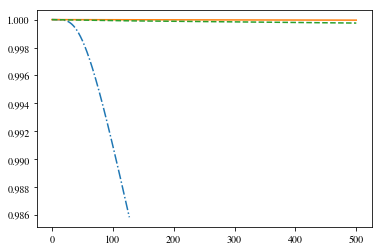

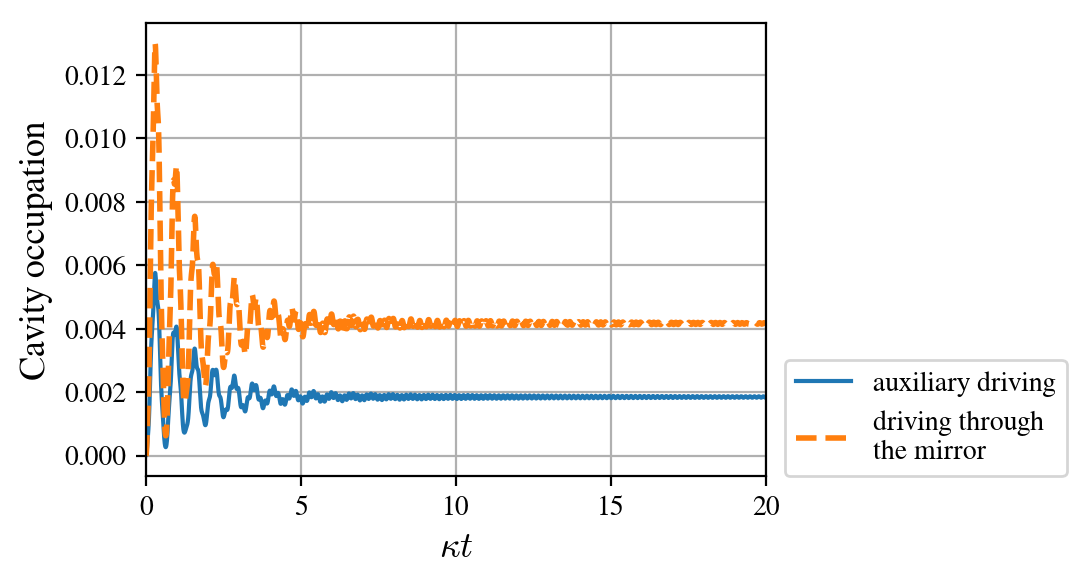

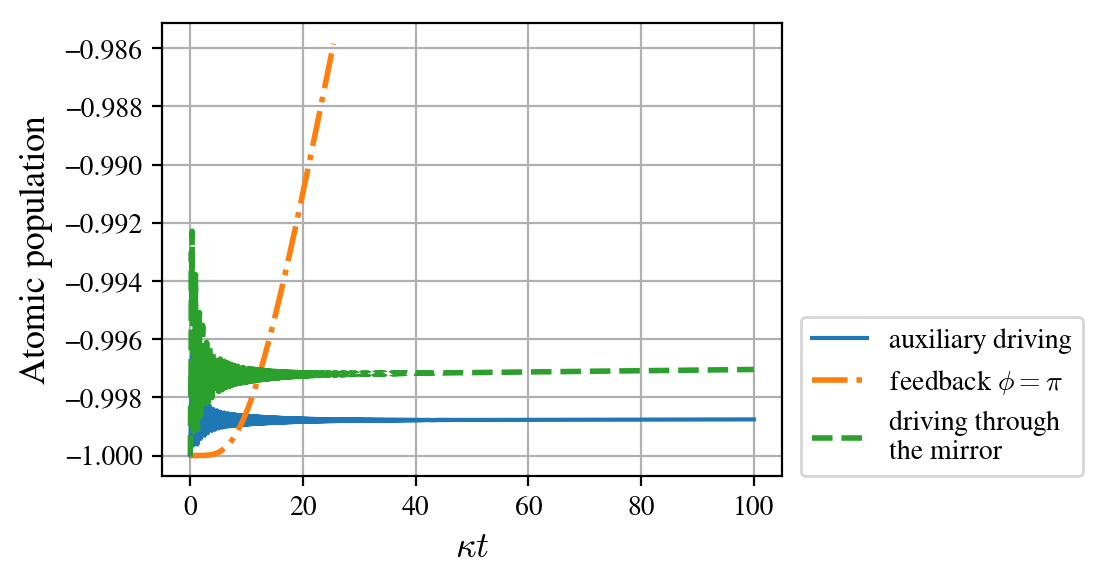

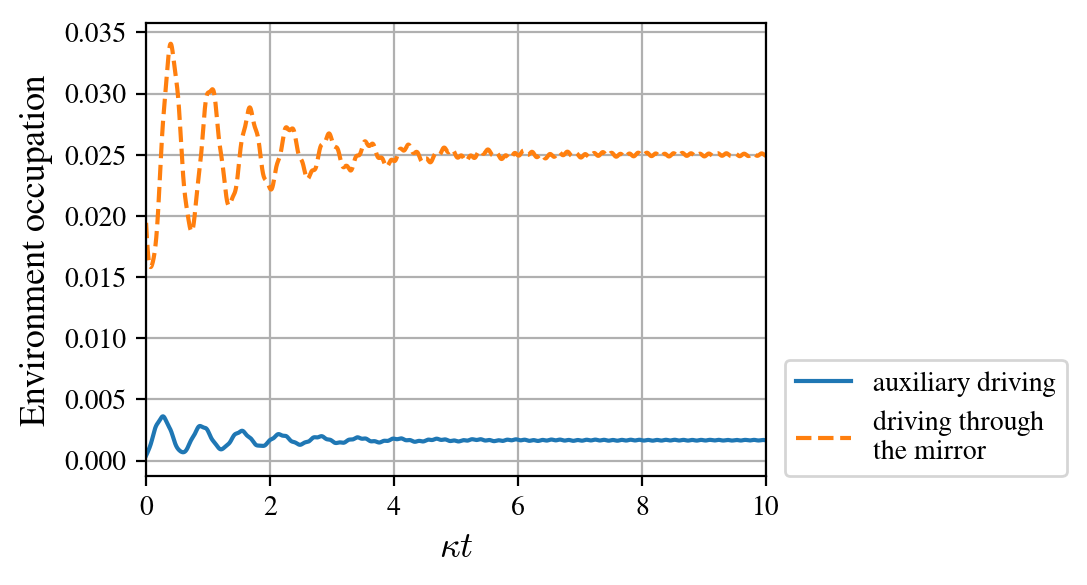

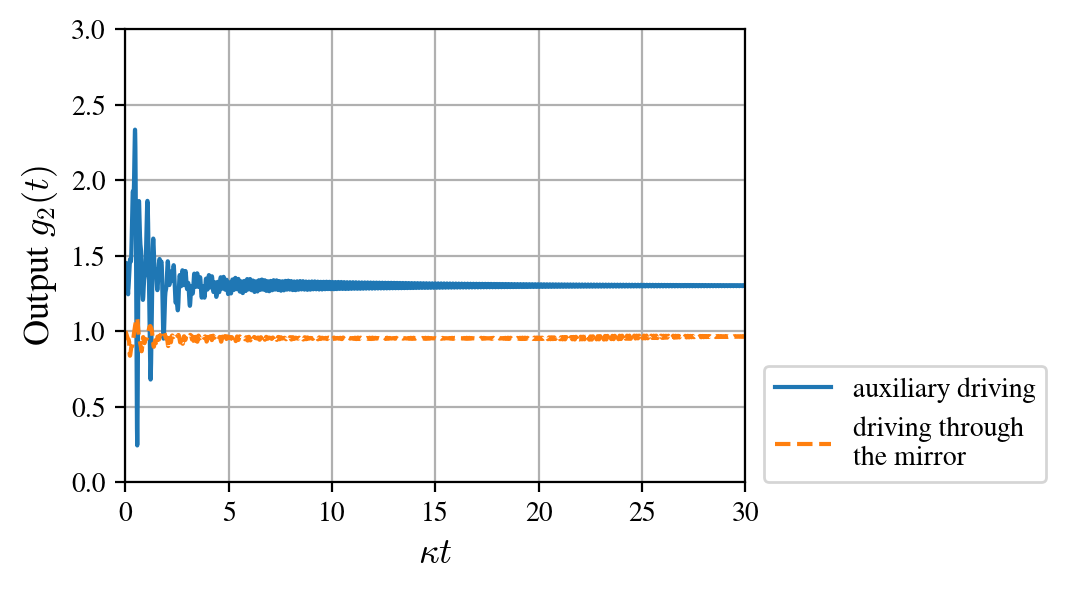

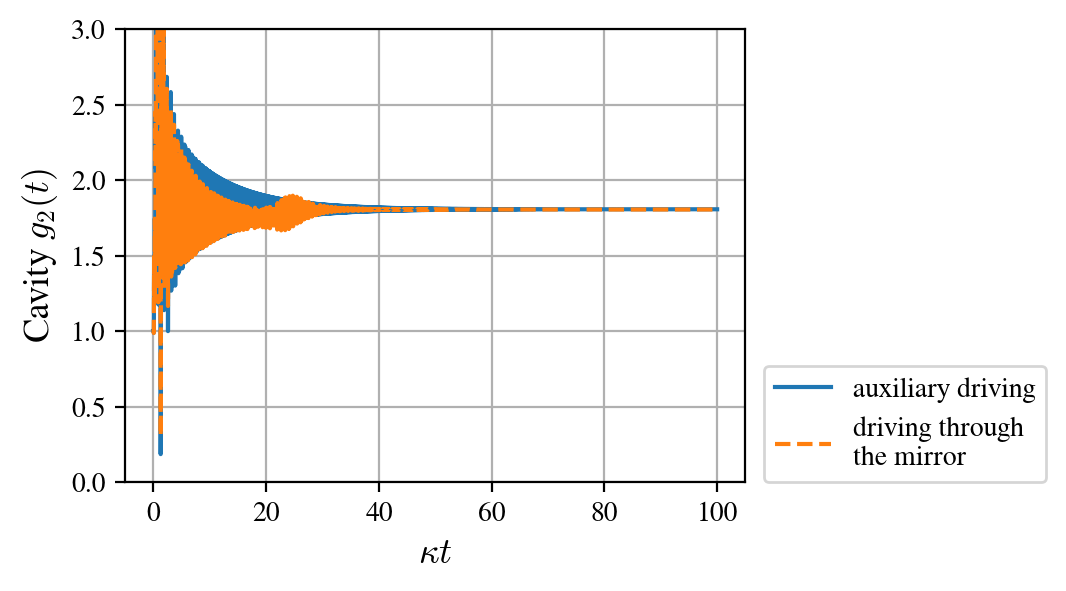

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=2
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%210)),dtype=complex)
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%211)),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%201)),dtype=complex)
                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%207)),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/evol%04d_cavity_drive.txt"%502)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%207)),dtype=complex)
#dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d.txt"%1)),dtype=complex)
datq=np.loadtxt("./Data/JC+fb/New/Qutip0210_cavity_drive.txt")
print(datq.shape)
t_q = datq[:,0]
cav_q = datq[:,1]
sigz_q=datq[:,2]
NB_q=datq[:,3]
NB2_q=datq[:,4]
g2_q=datq[:,5]
g22_q=datq[:,6]
kap = .4
t_1 = dat1[:,0]
norm_1 = dat1[:,1]
exc_1 = dat1[:,2]
gr_1 = dat1[:,3]
cav_1 = dat1[:,4]
g2c_1 = dat1[:,5]
g2_1 = dat1[:,6]
NB_1 = dat1[:,7]
t_2 = dat2[:,0]
norm_2 = dat2[:,1]
exc_2 = dat2[:,2]
gr_2 = dat2[:,3]
cav_2 = dat2[:,4]
g2c_2 = dat2[:,5]
g2_2 = dat2[:,6]
NB_2 = dat2[:,7]
t_3 = dat3[:,0]
norm_3 = dat3[:,1]
exc_3 = dat3[:,2]
gr_3 = dat3[:,3]
cav_3 = dat3[:,4]
g2c_3 = dat3[:,5]
g2_3 = dat3[:,6]
NB_3 = dat3[:,7]

dt=0.01
label1="auxiliary driving"#"no feedback"#"$\Delta=7$ with fb"
label2="driving through\nthe mirror"#"$\Delta=-7$ with fb"
label3="feedback $\phi=\pi$"
label4="$\Delta=7$ without fb (qutip)"

plt.figure(0)
plt.plot(t_3,norm_3,ls="-.")
plt.plot(t_1,norm_1)
plt.plot(t_2,norm_2,ls="--")
#plt.xlim(0,5)
plt.figure(1,dpi=200,figsize=(4,3))
plt.plot(t_1*.2,cav_1,label=label1)
#plt.plot(t_3,cav_3,lw=2,ls="-.",label=label3)
plt.plot(t_2*.2,cav_2,lw=2,ls="--",label=label2)
#plt.plot(t_q,cav_q,lw=2,ls=":",label=label4)
plt.legend(loc = (1.03,.0))
plt.ylabel("Cavity occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
plt.xlim(0,20)

plt.figure(2,dpi=200,figsize=(4,3))
plt.plot(t_1*.2,exc_1-gr_1,label=label1)
plt.plot(t_3*.2,exc_3-gr_3,lw=2,ls="-.",label=label3)
plt.plot(t_2*.2,exc_2-gr_2,lw=2,ls="--",label=label2)
#plt.plot(t_q,sigz_q,lw=2,ls=":",label=label4)
plt.legend(loc = (1.03,.0))
plt.ylabel("Atomic population",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(20,30)

plt.figure(3,dpi=200,figsize=(4,3))
plt.plot((t_1[101:]-1)*0.2,NB_1[101:]/dt, label=label1)
#plt.plot(t_3[100:]-1,NB_3[100:]/dt, ls="-.",label=label3)
plt.plot((t_2[101:]-1)*.2,NB_2[101:]/dt, ls="--",label=label2)
#plt.plot(t_q,NB2_q, ls=":",label=label4)
plt.grid(True)
plt.ylabel("Environment occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
plt.xlim(0,10)
print(NB_1[-1]-NB_1[-2])

plt.figure(4,dpi=200,figsize=(4,3))
plt.plot((t_1[101:]-1)*.2,g2_1[101:], label=label1)
#plt.plot(t_3[100:]-1,g2_3[100:], ls="-.",label=label3)
plt.plot((t_2[101:]-1)*.2,g2_2[101:],ls="--", label=label2)
#plt.plot(t_q,g22_q,ls=":", label=label4)
plt.ylabel("Output $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
plt.xlim(0,30)
plt.ylim(0,3)
plt.grid(True)

plt.figure(5,dpi=200,figsize=(4,3))
plt.plot(t_1[1:-1]*.2,g2c_1[1:-1], label=label1)
#plt.plot(t_3[1:-1],g2c_3[1:-1], ls="-.",label=label3)
plt.plot(t_2[1:-1]*.2,g2c_2[1:-1],ls="--",label=label2)
plt.legend(loc = (1.03,.0))
plt.grid(True)
plt.ylabel("Cavity $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
a = np.zeros(4,complex)
plt.ylim(0,3)
a += np.random.rand(4)+1j*np.random.rand(4)
print(len(a))

In [18]:
from scipy.optimize import fsolve
x = np.linspace(-10,10,3)
func = lambda x : x**3-3*x**2-(4**2+1**2)*x-3*1**2
print(fsolve(func,x))
print(func(-1.81237957))
print(func(-0.00438066))
print(func(8.81676024))
#-2.21164191 -0.0125178   7.2241597
# -2.21565831e+00  -3.12610201e-03   7.21878442e+00
print(-2.21164191+7.2241597)
print(-2.21565831+7.21878442e+00)
print(-0.0125178/-3.12610201e-03)
print(.1**2/(7+5)*3*400)
print(-4.92363919 -10.77208937)
print(5.94462123+2.76189995)

[-2.76189995 -0.18272128  5.94462123]
12.003134684856
-2.9255864346117697
299.2824521049358
5.01251779
5.00312611
4.004283916505975
1.0000000000000002
-15.69572856
8.70652118


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.009000142470980702+1.5805605143861514e-37j)
0.0049999999999954525


IndexError: index 15000 is out of bounds for axis 0 with size 15000

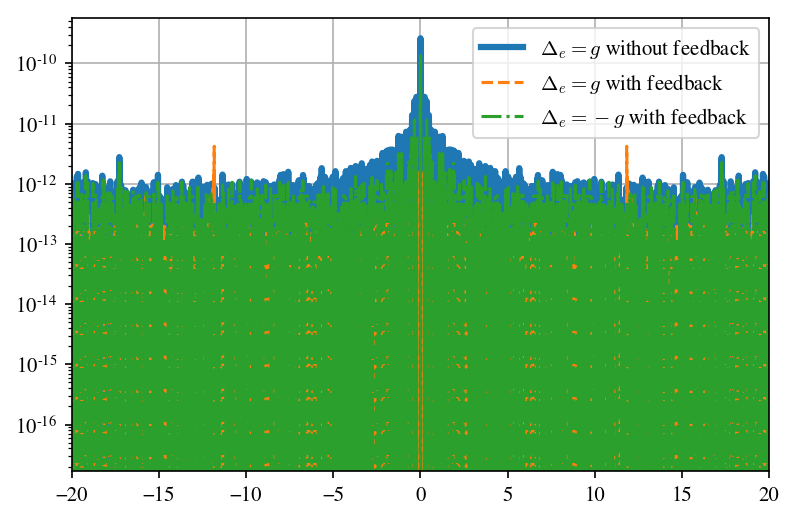

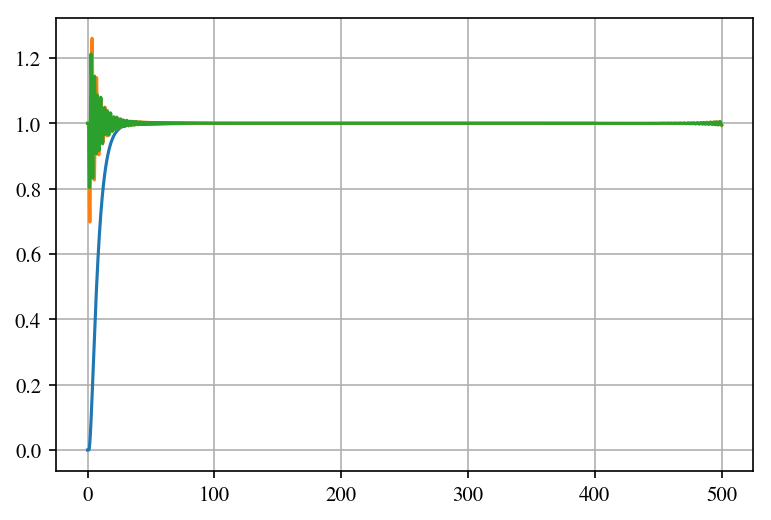

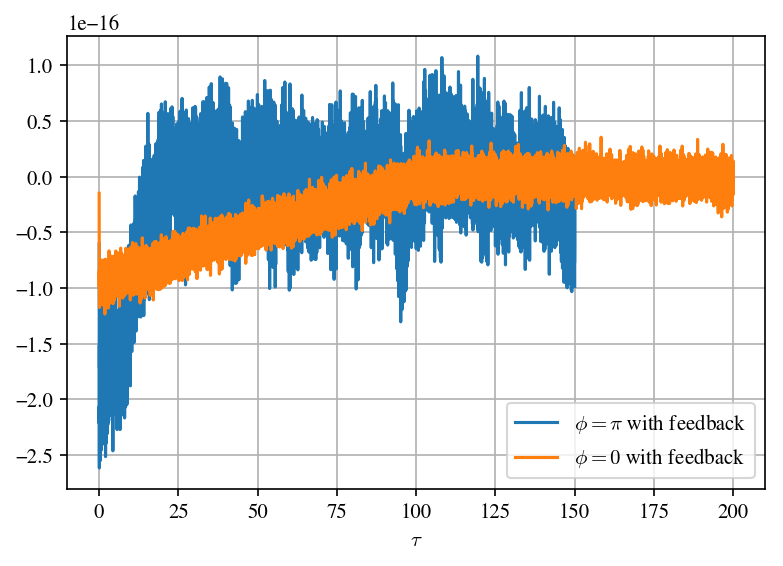

<Figure size 600x400 with 0 Axes>

In [19]:
ID=120
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_cavity_drive.txt"%(500))),dtype=complex)
dat2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_cavity_drive.txt"%(501))),dtype=complex)
dat3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/spec%04d_cavity_drive.txt"%(502))),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%(200))),dtype=complex)
datg1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_cavity_drive.txt"%502)),dtype=complex)
datg2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_coherent_environment.txt"%201)),dtype=complex)
datg3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/g2tau%04d_coherent_environment.txt"%202)),dtype=complex)
datc1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/corr%04d_cavity_drive.txt"%500)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%203)),dtype=complex)
datc2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/corr%04d_cavity_drive.txt"%501)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%202)),dtype=complex)
datc3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/JC+fb/New/corr%04d_cavity_drive.txt"%502)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%201)),dtype=complex)
datsq = np.loadtxt("./Data/JC+fb/New/Spec_Qutip%04d_cavity_drive.txt"%210)
om1 = dat1[:,0]
spec1=dat1[:,1]
om2 = dat2[:,0]
spec2=dat2[:,1]
om3 = dat3[:,0]
spec3=dat3[:,1]
tau=datg1[:,0]
g2=datg1[:,1]
tau2=datg2[:,0]
g22=datg2[:,1]
tau3=datg3[:,0]
g23=datg3[:,1]
tc1 = datc1[:,0]
corr1 = datc1[:,1]
tc2 = datc2[:,0]
corr2 = datc2[:,1]
tc3 = datc3[:,0]
corr3 = datc3[:,1]
#tc4 = datc4[:,0]
#corr4 = datc4[:,1]
#tc5 = datc5[:,0]
#corr5 = datc5[:,1]
omq=datsq[:,0]
specq=datsq[:,1]*0.002
kap=2
g=4
plt.figure(dpi=150)
#plt.plot(om,spec)
plt.plot(om1,spec1,label="$\Delta_e=g$ without feedback",lw=3)
plt.plot(om2,spec2,label="$\Delta_e=g$ with feedback",ls="--")
plt.plot(om3,spec3,label="$\Delta_e=-g$ with feedback",ls="-.")
#plt.plot(om,1/(om**2+(kap)**2)/50*2)
plt.xlim(-20,20)
plt.grid(True)
plt.legend(loc="best")
plt.yscale("log")
#plt.hlines(.5*np.max(spec),-10,10,linestyles="dashed")
#plt.vlines(-11.5,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(-1.5,-.0,np.max(spec),linestyles="dashed")
#plt.yscale("log")
#plt.vlines(kap,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(-g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(-np.sqrt(4)*g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(np.sqrt(4)*g,-.0,np.max(spec),linestyles="dashed")
plt.figure(dpi=150)
plt.grid(True)
plt.plot(tau[1:],g2[1:][::-1])
plt.plot(tau2[1:],g22[1:][::-1])
plt.plot(tau3[1:],g23[1:][::-1])
#print(g2[-1])
#plt.figure(dpi=100)
#fft_3 = np.fft.fftshift(np.fft.fft(NB_3-NB_3[-1]))
#print(t_3.shape[-1],np.real(t_3[1]-t_3[0]))
#omp = np.fft.fftshift(np.fft.fftfreq(t_3.shape[-1],np.real(t_3[1]-t_3[0])))
#plt.plot(omp*2*np.pi,np.abs(fft_3))
#print(omp)
#plt.hlines(.5*np.max(np.abs(fft_3)),-10,10,linestyles="dashed")
#plt.vlines(-kap/np.sqrt(2),-.0,np.max(np.abs(fft_3)),linestyles="dashed")
#plt.vlines(kap/np.sqrt(2),-.0,np.max(np.abs(fft_3)),linestyles="dashed")
#plt.xlim(-20,20)
plt.figure(dpi=150)
plt.grid(True)
print(corr1[0]-0.01-NB_1[-1]*0.01)
#corr1[0]=NB_1[-2]*0.01
#corr2[0]=NB_2[-2]*0.01
#corr3[0]=NB_3[-2]*0.01
plt.plot(tc3[0:],(corr3[0:]-np.average(corr3[10000:])),label="$\phi=\pi$ with feedback")
plt.plot(tc2[0:],(corr2[0:]-np.average(corr2[10000:])),label="$\phi=0$ with feedback")
#plt.plot(tc1[0:],(corr1[0:]-np.average(corr1[10000:])),label="without feedback")
plt.legend(loc="best")
#print(corr[1],corr[1]-corr[0]+0.01)
plt.xlabel("$\\tau$")
plt.figure(dpi=100)
fft_1 = np.fft.fftshift(np.fft.fft((corr1[0:]-np.average(corr1[10000:]))[::-1]))
fft_2 = np.fft.fftshift(np.fft.fft((corr2[0:]-np.average(corr2[10000:]))[::-1]))
fft_3 = np.fft.fftshift(np.fft.fft((corr3[0:]-np.average(corr3[10000:]))[::-1]))
#fft_4 = np.fft.fftshift(np.fft.fft((corr4[1:]-np.average(corr4[1:]))[::-1]))
#fft_5 = np.fft.fftshift(np.fft.fft((corr5[1:]-np.average(corr5[1:]))[::-1]))
omp1 = np.fft.fftshift(np.fft.fftfreq(tc1[0:].shape[-1],np.real(tc1[1]-tc1[0])))
omp2 = np.fft.fftshift(np.fft.fftfreq(tc2[0:].shape[-1],np.real(tc2[1]-tc2[0])))
omp3 = np.fft.fftshift(np.fft.fftfreq(tc3[0:].shape[-1],np.real(tc3[1]-tc3[0])))
#omp4 = np.fft.fftshift(np.fft.fftfreq(tc4[1:].shape[-1],np.real(tc4[1]-tc4[0])))
#omp5 = np.fft.fftshift(np.fft.fftfreq(tc5[1:].shape[-1],np.real(tc5[1]-tc5[0])))
freq = np.linspace(-20,20,1001)
fft_1_bh=np.zeros(freq.shape,complex)
fft_2_bh=np.zeros(freq.shape,complex)
fft_3_bh=np.zeros(freq.shape,complex)
print(omp1[1]-omp1[0])
for i in range(len(corr1[0:])):
    fft_1_bh += (corr1[i]-np.average(corr1[0:]))*np.exp(1j*freq*i*(tc1[1]-tc1[0]))
    fft_2_bh += (corr2[i]-np.average(corr2[0:]))*np.exp(1j*freq*i*(tc2[1]-tc2[0]))
    fft_3_bh += (corr3[i]-np.average(corr3[0:]))*np.exp(1j*freq*i*(tc3[1]-tc3[0]))
print(np.abs(fft_1_bh).dtype)
#plt.plot(freq,np.real(fft_1_bh),label="$\Delta=7$ without feedback",lw=3)
#plt.plot(omq,specq,label="$\Delta=4$ without feedback (Qutip)",lw=3)
plt.plot(omp1*2*np.pi,np.real(fft_1)/np.max(np.real(fft_1)),label="without feedback",lw=3)
plt.plot(omp2*2*np.pi,np.real(fft_2)/np.max(np.real(fft_2)),label="$\phi=0$ with feedback",ls="--")
Lorentz = 0.2/((omp1*2*np.pi)**2+.2**2)
Lorentz = Lorentz/np.max(Lorentz)*np.max(np.real(fft_1))
#plt.plot(omp1*2*np.pi,Lorentz)
plt.plot(omp3*2*np.pi,np.real(fft_3)/np.max(np.real(fft_3)),label="$\phi=\pi$ with feedback",ls="-.")
#plt.plot(omp4*2*np.pi,np.abs(fft_4),label="$\Delta=10$")
#plt.plot(omp5*2*np.pi,np.abs(fft_5),label="$\Delta=16$")
plt.vlines(-.2,np.min(np.real(fft_1)),np.max(np.real(fft_1)),color="grey",linestyles="--",label="$g$")
plt.vlines(.2,np.min(np.real(fft_1)),np.max(np.real(fft_1)),color="grey",linestyles="--",label="$g$")
plt.xlim(-10,10)
plt.legend(loc="best")
plt.grid(True)
#plt.yscale("log")
mpl.rc('xtick',labelsize=20)
mpl.rc('ytick',labelsize=20)
plt.figure(dpi=100)
#plt.plot(omq,specq,label="$\Delta=7$ without feedback (Qutip)",lw=5)
plt.plot(omp1*2*np.pi,np.real(fft_1),label="$\Delta_e=7g/4$ without feedback",lw=5)
plt.plot(omp2*2*np.pi,np.real(fft_2),label="$\Delta_e=7g/4$ with feedback",ls="--",lw=3)
plt.plot(omp3*2*np.pi,np.real(fft_3),label="$\Delta_e=-7g/4$ with feedback",ls="-.",lw=3)
plt.xlim(-1,1)
#plt.ylim(-2*10**(-10),.8*10**(-8))
plt.ylim(-80*10**(-7),.8*10**(-5))

plt.grid(True)

In [ ]:
plt.figure()
plt.plot(freq,np.real(fft_1_bh)/np.max(np.real(np.abs(fft_1_bh))),label="$\Delta=7$ without feedback",lw=3)
#plt.plot(omq,specq,label="$\Delta=4$ without feedback (Qutip)",lw=3)
#plt.plot(omp1*2*np.pi,np.real(fft_1)/np.max(np.real(np.abs(fft_1))),label="$\Delta_e=g/2$ without feedback",lw=3)
plt.plot(freq,np.real(fft_2_bh)/np.max(np.real(np.abs(fft_2_bh))),label="$\Delta_e=g/2$ with feedback",ls="--")
plt.plot(freq,np.real(fft_3_bh)/np.max(np.real(np.abs(fft_3_bh))),label="$\Delta_e=-g/2$ with feedback",ls="-.")
plt.xlim(-5,5)
#plt.yscale("log")

In [ ]:
import scipy as sc
N_env=5
dB  = sc.eye(N_env,N_env,1)*np.sqrt(np.arange(0,N_env))
dBd = sc.eye(N_env,N_env,-1)*np.sqrt(np.arange(1,N_env+1))
print(np.dot(dBd,dB))

In [ ]:
a = np.linspace(0,4,5)
a[0:5:2]

In [ ]:
N_env=5
nBdiag = np.linspace(0,N_env,N_env+1).astype(np.int64)
nB = np.diag(nBdiag)
nB2 = np.diag(nBdiag-1)
g2Bop = nB*nB2
print(nB)
print(g2Bop)
dB  = sc.eye(N_env,N_env,1)*np.sqrt(dt*np.arange(0,N_env)) 
dBd = sc.eye(N_env,N_env,-1)*np.sqrt(dt*np.arange(1,N_env+1)) 
np.dot(dB,dBd)

In [20]:
dt = 0.01
dB  = sc.eye(N_env+1,N_env+1,1)*np.sqrt(dt*np.arange(0,N_env+1))
np.einsum("ij,ki,kl,lm->jm",np.conjugate(dB),np.conjugate(dB),dB,dB)/dt**2

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 20.]])

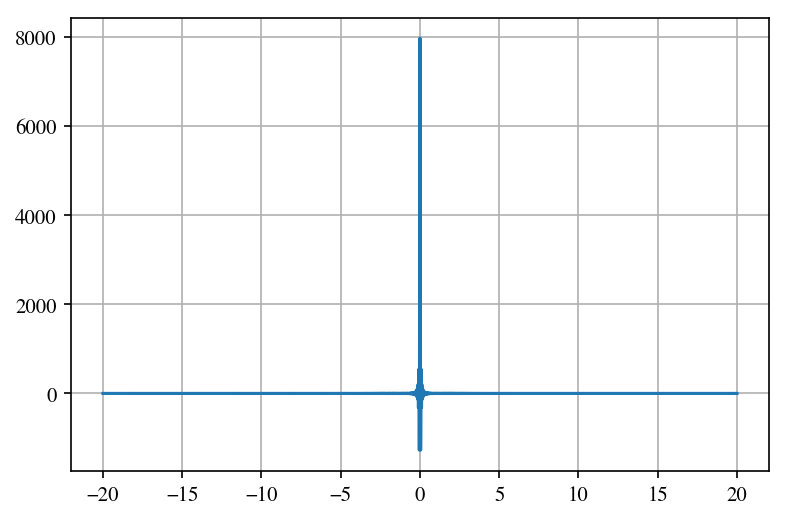

In [21]:
sum_NB = np.zeros(5001)
nu = np.linspace(-20,20,5001)
for j in range(5001):
    for i in range(NB_3.shape[0]):
        sum_NB[j] += np.real(np.sqrt(NB_3[-1]*NB_3[-(1+i)])*np.exp(1j*nu[j]*i*0.01)/0.01)*2
        
plt.figure(dpi=150)
plt.plot(nu,sum_NB)
plt.grid(True)

In [22]:
t = np.linspace(0,50,5001)
a = (np.sin(1*np.pi*t)+np.sin(.2*np.pi*t))*np.exp(-t)

fres=10001
sum_a = np.zeros(fres)
#nu = np.linspace(-20,20,fres)
#for j in range(fres):
#    for i in range(a.shape[0]):
#        sum_a[j] += np.real(np.sqrt(a[-1]*a[-(1+i)])*np.exp(1j*nu[j]*i*(t[1]-t[0]))/(t[1]-t[0]))*2
        


ValueError: x and y must have same first dimension, but have shapes (5001,) and (10001,)

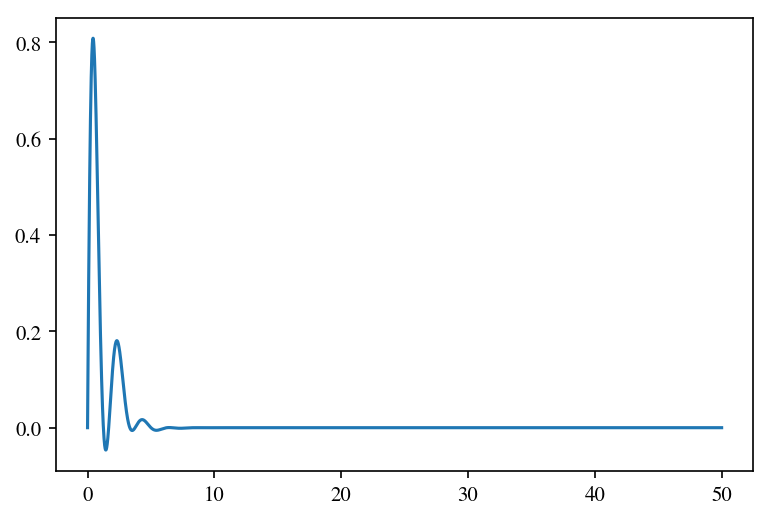

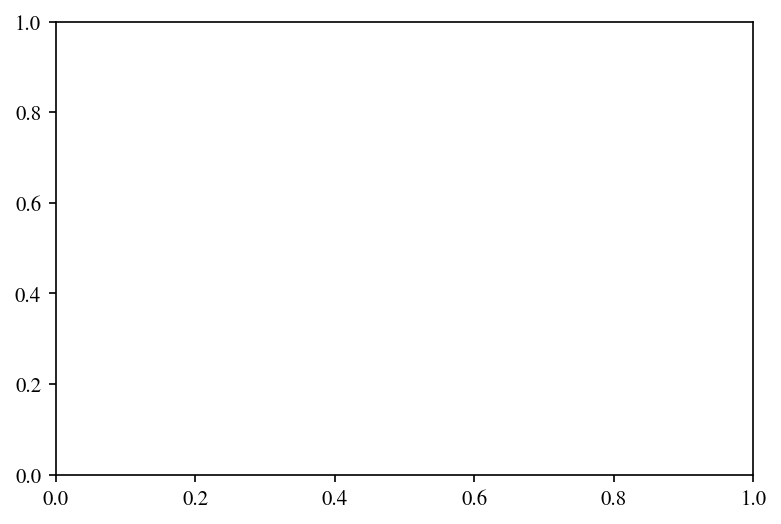

In [23]:
plt.figure(1,dpi=150)
plt.plot(t,a)
plt.figure(2,dpi=150)
plt.plot(nu,sum_a)
plt.grid(True)


0.01
0.0199960007998


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


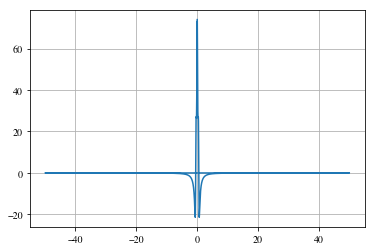

In [171]:
sp = np.fft.fft(a)
print(t[1]-t[0])
freq = np.fft.fftfreq(t.shape[-1],(t[1]-t[0]))
print(freq[1]-freq[0])
plt.plot(freq,sp)
#plt.xlim(-10,10)
plt.grid(True)